In [1]:
#Resources: https://www.youtube.com/watch?v=BzcBsTou0C0&list=PLQVvvaa0QuDdeMyHEYc0gxFpYwHY2Qfdh&index=1

import torch
import torchvision #datasets
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import torch.optim as optim
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F

In [2]:
#A tensor is a generalization of vectors and matrices and is easily understood as a multidimensional array.
x = torch.Tensor([5,3])
y = torch.Tensor([2,1])

print(x*y)

tensor([10.,  3.])


In [3]:
#Numpy calls tensors (high dimensional matrices or vectors) arrays while in PyTorch there’s just called tensors. 
#In terms of array operations, pytorch is considerably fast over numpy.
#Even if you already know Numpy, there are still a couple of reasons to switch to PyTorch for tensor computation. The main reason is the GPU acceleration. 
#As you’ll see, using a GPU with PyTorch is super easy and super fast. If you do large computations, this is beneficial because it speeds things up a lot.
x = torch.zeros(2,5)
print(x)
print(x.shape)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
torch.Size([2, 5])


In [4]:
y = torch.rand(2,10) 
print(y)

tensor([[0.6312, 0.9855, 0.1779, 0.4326, 0.8492, 0.7353, 0.2003, 0.1787, 0.9679,
         0.0031],
        [0.0810, 0.4015, 0.3023, 0.6444, 0.7207, 0.2925, 0.4476, 0.3484, 0.4462,
         0.1414]])


In [5]:
#A flatten operation on a tensor reshapes the tensor to have a shape that is equal to the number of elements contained in the tensor. 
#This is the same thing as a 1d-array of elements. Flattening a tensor means to remove all of the dimensions except for one.
y = torch.flatten(y)
print(y)
#y.view([1,20])

tensor([0.6312, 0.9855, 0.1779, 0.4326, 0.8492, 0.7353, 0.2003, 0.1787, 0.9679,
        0.0031, 0.0810, 0.4015, 0.3023, 0.6444, 0.7207, 0.2925, 0.4476, 0.3484,
        0.4462, 0.1414])


In [6]:
#We are going to work with the MNIST dataset
#Transforms are common image transformations. They can be chained together using Compose. It basically composes several transforms together.
train_df = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()])) 
test_df = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()])) 

Extracting MNIST\raw\train-images-idx3-ubyte.gz to MNIST\raw


Extracting MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\raw


Extracting MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\raw


Extracting MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\raw
Processing...


..\torch\csrc\utils\tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Done!


In [7]:
#At the heart of PyTorch data loading utility is the torch.utils.data.DataLoader class. It represents a Python iterable over a dataset.
trainset = torch.utils.data.DataLoader(train_df, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test_df, batch_size=10, shuffle=True)

In [8]:
#Iterate over data
for data in trainset:
    print(data)
    break

#This is our entire batch and so it'll be 10 examples of handwritten digits and then 10 tensors of the actual output 

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [9]:
x, y = data[0][0], data[1][0]
print(x)
print(y)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

torch.Size([1, 28, 28])



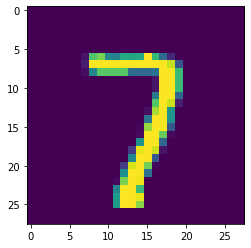

In [10]:
print(data[0][0].shape)

plt.imshow(data[0][0].view(28,28))
plt.show()

In [11]:
#Make sure your data is balanced
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [12]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [13]:
class Net(nn.Module):

    def __init__(self):
        super().__init__() #Your parent's class initialization method is going to run

    #nn.Linear: Fully connected layers
    #Our images are 28x28 and we can't pass the image to the layer, instead we pass the flattened image. 
    #So, you can think of the pixels like rows and when we flatten those there are just many rows of pixels (which is why the
    #input will be a flattened 28x28).
    #Our target here is to make a three layers of 64 neurons for our hidden layers, so the output will be 64. 
    #Basically, the output can be whatever we want.
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64) #This second layer takes in as input 64 because the previous layer's output is 64
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10) #This is our output layer and we want our output to be 10 because we have 10 classes (numbers from 0 to 9)

  #The the method below defines how the data will flow through our network
    def forward(self, x): 
    #We are going to run our activation function (relu) literally over the entire layer
    #Activation functions are mathematical equations that determine the output of a neural network. The function is attached to 
    #each neuron in the network, and determines whether it should be activated ("fired") or not, based on whether each neuron's
    #input is relevant for the model's prediction.
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
    #Keep in mind that the activation function runs on the output. We are not actually running anything on the output layer because here our goal is to 
    #determine the class and in order to do that we're going to do a probability distribution on the output (which is why we are going to use log softmax).
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

In [14]:
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [15]:
X = torch.rand((28,28))
X = X.view(-1,28*28) #X.view(1,28*28)
X

tensor([[3.1778e-01, 3.9581e-01, 1.4105e-01, 7.4205e-01, 3.7466e-01, 5.3187e-01,
         8.6025e-01, 7.4031e-01, 7.9153e-01, 1.1334e-01, 1.4712e-01, 4.4170e-01,
         2.4942e-01, 8.5306e-01, 9.9639e-01, 8.4861e-01, 8.7208e-01, 3.1527e-01,
         4.2449e-01, 8.6356e-01, 6.1205e-01, 3.2310e-01, 7.3644e-01, 6.8285e-03,
         2.5925e-01, 2.0444e-01, 8.4401e-01, 2.2121e-01, 7.3216e-01, 2.3453e-01,
         4.8717e-01, 8.7337e-01, 5.4730e-01, 9.3713e-01, 2.4189e-01, 9.9138e-01,
         4.6481e-01, 3.1916e-01, 9.2023e-01, 2.5504e-01, 4.2443e-01, 9.2591e-01,
         2.6996e-01, 3.7123e-01, 1.4569e-01, 5.7357e-01, 4.9738e-01, 3.3260e-01,
         8.9219e-02, 3.7308e-01, 9.9645e-01, 8.4796e-01, 2.6942e-01, 5.3553e-01,
         9.5831e-01, 6.9533e-01, 6.3312e-01, 1.9706e-01, 7.1968e-02, 7.8091e-01,
         4.4115e-01, 4.9916e-01, 8.8120e-01, 9.4681e-01, 1.2512e-02, 8.3940e-01,
         7.0176e-01, 8.5414e-02, 5.5205e-01, 4.2572e-01, 9.1542e-01, 4.6382e-01,
         7.9857e-01, 7.8794e

In [16]:
output = net(X)
output

tensor([[-2.4005, -2.1956, -2.2375, -2.3631, -2.2229, -2.1930, -2.3673, -2.3432,
         -2.2706, -2.4732]], grad_fn=<LogSoftmaxBackward>)

In [17]:
#The learning rate dictates the size of the step that the optimizer will take to get to the minimum
optimizer = optim.Adam(net.parameters(), lr=0.001)

#Iterate over data 
epochs = 3
for epoch in range(epochs): 
    for data in trainset: #data is a batch of feature sets and labels
        X, y = data #X: batch of features; y: batch of targets
        net.zero_grad() #Sets gradients to zero before calculating the loss
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward() #backpropagation
        optimizer.step() #This is going to adjust the weights for us
        print(loss) 

tensor(2.3148, grad_fn=<NllLossBackward>)
tensor(2.3090, grad_fn=<NllLossBackward>)
tensor(2.3019, grad_fn=<NllLossBackward>)
tensor(2.2779, grad_fn=<NllLossBackward>)
tensor(2.2690, grad_fn=<NllLossBackward>)
tensor(2.3019, grad_fn=<NllLossBackward>)
tensor(2.2967, grad_fn=<NllLossBackward>)
tensor(2.3599, grad_fn=<NllLossBackward>)
tensor(2.3282, grad_fn=<NllLossBackward>)
tensor(2.3098, grad_fn=<NllLossBackward>)
tensor(2.2551, grad_fn=<NllLossBackward>)
tensor(2.3328, grad_fn=<NllLossBackward>)
tensor(2.3072, grad_fn=<NllLossBackward>)
tensor(2.3119, grad_fn=<NllLossBackward>)
tensor(2.2425, grad_fn=<NllLossBackward>)
tensor(2.2719, grad_fn=<NllLossBackward>)
tensor(2.2395, grad_fn=<NllLossBackward>)
tensor(2.2997, grad_fn=<NllLossBackward>)
tensor(2.2296, grad_fn=<NllLossBackward>)
tensor(2.2481, grad_fn=<NllLossBackward>)
tensor(2.2466, grad_fn=<NllLossBackward>)
tensor(2.2770, grad_fn=<NllLossBackward>)
tensor(2.1935, grad_fn=<NllLossBackward>)
tensor(2.2453, grad_fn=<NllLossBac

tensor(0.4549, grad_fn=<NllLossBackward>)
tensor(0.3140, grad_fn=<NllLossBackward>)
tensor(0.2834, grad_fn=<NllLossBackward>)
tensor(0.2678, grad_fn=<NllLossBackward>)
tensor(0.3952, grad_fn=<NllLossBackward>)
tensor(0.4235, grad_fn=<NllLossBackward>)
tensor(0.3527, grad_fn=<NllLossBackward>)
tensor(0.3937, grad_fn=<NllLossBackward>)
tensor(0.6892, grad_fn=<NllLossBackward>)
tensor(0.4170, grad_fn=<NllLossBackward>)
tensor(0.7990, grad_fn=<NllLossBackward>)
tensor(0.9444, grad_fn=<NllLossBackward>)
tensor(0.9917, grad_fn=<NllLossBackward>)
tensor(0.4535, grad_fn=<NllLossBackward>)
tensor(1.3606, grad_fn=<NllLossBackward>)
tensor(1.6512, grad_fn=<NllLossBackward>)
tensor(0.3648, grad_fn=<NllLossBackward>)
tensor(0.5968, grad_fn=<NllLossBackward>)
tensor(0.5887, grad_fn=<NllLossBackward>)
tensor(0.3863, grad_fn=<NllLossBackward>)
tensor(0.4096, grad_fn=<NllLossBackward>)
tensor(0.9914, grad_fn=<NllLossBackward>)
tensor(0.4591, grad_fn=<NllLossBackward>)
tensor(0.8167, grad_fn=<NllLossBac

tensor(0.2085, grad_fn=<NllLossBackward>)
tensor(0.9132, grad_fn=<NllLossBackward>)
tensor(0.1647, grad_fn=<NllLossBackward>)
tensor(0.4292, grad_fn=<NllLossBackward>)
tensor(0.1091, grad_fn=<NllLossBackward>)
tensor(0.3777, grad_fn=<NllLossBackward>)
tensor(0.1225, grad_fn=<NllLossBackward>)
tensor(0.1560, grad_fn=<NllLossBackward>)
tensor(0.2867, grad_fn=<NllLossBackward>)
tensor(0.8275, grad_fn=<NllLossBackward>)
tensor(0.5285, grad_fn=<NllLossBackward>)
tensor(0.0329, grad_fn=<NllLossBackward>)
tensor(0.7671, grad_fn=<NllLossBackward>)
tensor(0.2831, grad_fn=<NllLossBackward>)
tensor(0.5199, grad_fn=<NllLossBackward>)
tensor(0.4472, grad_fn=<NllLossBackward>)
tensor(0.9510, grad_fn=<NllLossBackward>)
tensor(0.4764, grad_fn=<NllLossBackward>)
tensor(0.2404, grad_fn=<NllLossBackward>)
tensor(0.1702, grad_fn=<NllLossBackward>)
tensor(0.1193, grad_fn=<NllLossBackward>)
tensor(0.6546, grad_fn=<NllLossBackward>)
tensor(0.4246, grad_fn=<NllLossBackward>)
tensor(0.3290, grad_fn=<NllLossBac

tensor(0.1272, grad_fn=<NllLossBackward>)
tensor(0.3249, grad_fn=<NllLossBackward>)
tensor(0.2675, grad_fn=<NllLossBackward>)
tensor(0.5776, grad_fn=<NllLossBackward>)
tensor(0.6110, grad_fn=<NllLossBackward>)
tensor(0.4482, grad_fn=<NllLossBackward>)
tensor(0.7647, grad_fn=<NllLossBackward>)
tensor(0.1432, grad_fn=<NllLossBackward>)
tensor(0.2916, grad_fn=<NllLossBackward>)
tensor(0.1320, grad_fn=<NllLossBackward>)
tensor(0.2668, grad_fn=<NllLossBackward>)
tensor(1.1045, grad_fn=<NllLossBackward>)
tensor(0.1280, grad_fn=<NllLossBackward>)
tensor(0.3490, grad_fn=<NllLossBackward>)
tensor(0.1266, grad_fn=<NllLossBackward>)
tensor(0.9167, grad_fn=<NllLossBackward>)
tensor(0.4949, grad_fn=<NllLossBackward>)
tensor(0.2260, grad_fn=<NllLossBackward>)
tensor(0.8637, grad_fn=<NllLossBackward>)
tensor(0.1716, grad_fn=<NllLossBackward>)
tensor(0.3023, grad_fn=<NllLossBackward>)
tensor(0.3432, grad_fn=<NllLossBackward>)
tensor(0.2919, grad_fn=<NllLossBackward>)
tensor(0.2111, grad_fn=<NllLossBac

tensor(0.2350, grad_fn=<NllLossBackward>)
tensor(0.2928, grad_fn=<NllLossBackward>)
tensor(0.0876, grad_fn=<NllLossBackward>)
tensor(0.3817, grad_fn=<NllLossBackward>)
tensor(0.4558, grad_fn=<NllLossBackward>)
tensor(0.1325, grad_fn=<NllLossBackward>)
tensor(0.2635, grad_fn=<NllLossBackward>)
tensor(0.1833, grad_fn=<NllLossBackward>)
tensor(0.2453, grad_fn=<NllLossBackward>)
tensor(0.3801, grad_fn=<NllLossBackward>)
tensor(0.1468, grad_fn=<NllLossBackward>)
tensor(0.7546, grad_fn=<NllLossBackward>)
tensor(0.3638, grad_fn=<NllLossBackward>)
tensor(0.2847, grad_fn=<NllLossBackward>)
tensor(0.1881, grad_fn=<NllLossBackward>)
tensor(0.9692, grad_fn=<NllLossBackward>)
tensor(0.3503, grad_fn=<NllLossBackward>)
tensor(0.0721, grad_fn=<NllLossBackward>)
tensor(0.4514, grad_fn=<NllLossBackward>)
tensor(0.0829, grad_fn=<NllLossBackward>)
tensor(0.0574, grad_fn=<NllLossBackward>)
tensor(0.5635, grad_fn=<NllLossBackward>)
tensor(0.1244, grad_fn=<NllLossBackward>)
tensor(0.4617, grad_fn=<NllLossBac

tensor(0.4628, grad_fn=<NllLossBackward>)
tensor(0.0890, grad_fn=<NllLossBackward>)
tensor(0.3671, grad_fn=<NllLossBackward>)
tensor(0.3298, grad_fn=<NllLossBackward>)
tensor(0.1247, grad_fn=<NllLossBackward>)
tensor(0.1490, grad_fn=<NllLossBackward>)
tensor(0.3707, grad_fn=<NllLossBackward>)
tensor(0.4603, grad_fn=<NllLossBackward>)
tensor(0.1976, grad_fn=<NllLossBackward>)
tensor(0.2932, grad_fn=<NllLossBackward>)
tensor(0.4460, grad_fn=<NllLossBackward>)
tensor(0.9872, grad_fn=<NllLossBackward>)
tensor(0.0240, grad_fn=<NllLossBackward>)
tensor(0.0469, grad_fn=<NllLossBackward>)
tensor(0.0716, grad_fn=<NllLossBackward>)
tensor(0.3721, grad_fn=<NllLossBackward>)
tensor(1.1952, grad_fn=<NllLossBackward>)
tensor(0.0972, grad_fn=<NllLossBackward>)
tensor(0.3715, grad_fn=<NllLossBackward>)
tensor(1.5408, grad_fn=<NllLossBackward>)
tensor(1.4926, grad_fn=<NllLossBackward>)
tensor(0.1191, grad_fn=<NllLossBackward>)
tensor(0.6446, grad_fn=<NllLossBackward>)
tensor(0.4455, grad_fn=<NllLossBac

tensor(0.1672, grad_fn=<NllLossBackward>)
tensor(0.3924, grad_fn=<NllLossBackward>)
tensor(0.5261, grad_fn=<NllLossBackward>)
tensor(0.0790, grad_fn=<NllLossBackward>)
tensor(0.1738, grad_fn=<NllLossBackward>)
tensor(0.3672, grad_fn=<NllLossBackward>)
tensor(0.3771, grad_fn=<NllLossBackward>)
tensor(0.5860, grad_fn=<NllLossBackward>)
tensor(0.0319, grad_fn=<NllLossBackward>)
tensor(0.5593, grad_fn=<NllLossBackward>)
tensor(0.3635, grad_fn=<NllLossBackward>)
tensor(1.2817, grad_fn=<NllLossBackward>)
tensor(0.0411, grad_fn=<NllLossBackward>)
tensor(0.1558, grad_fn=<NllLossBackward>)
tensor(0.1914, grad_fn=<NllLossBackward>)
tensor(0.0577, grad_fn=<NllLossBackward>)
tensor(0.2654, grad_fn=<NllLossBackward>)
tensor(0.0377, grad_fn=<NllLossBackward>)
tensor(0.0748, grad_fn=<NllLossBackward>)
tensor(0.1680, grad_fn=<NllLossBackward>)
tensor(0.6211, grad_fn=<NllLossBackward>)
tensor(0.3755, grad_fn=<NllLossBackward>)
tensor(0.5037, grad_fn=<NllLossBackward>)
tensor(0.9440, grad_fn=<NllLossBac

tensor(0.3938, grad_fn=<NllLossBackward>)
tensor(0.2596, grad_fn=<NllLossBackward>)
tensor(0.1097, grad_fn=<NllLossBackward>)
tensor(0.0877, grad_fn=<NllLossBackward>)
tensor(0.1033, grad_fn=<NllLossBackward>)
tensor(0.9041, grad_fn=<NllLossBackward>)
tensor(0.1084, grad_fn=<NllLossBackward>)
tensor(0.0062, grad_fn=<NllLossBackward>)
tensor(0.8430, grad_fn=<NllLossBackward>)
tensor(0.5102, grad_fn=<NllLossBackward>)
tensor(0.5142, grad_fn=<NllLossBackward>)
tensor(0.3809, grad_fn=<NllLossBackward>)
tensor(0.0892, grad_fn=<NllLossBackward>)
tensor(0.0918, grad_fn=<NllLossBackward>)
tensor(0.3706, grad_fn=<NllLossBackward>)
tensor(0.7774, grad_fn=<NllLossBackward>)
tensor(0.0710, grad_fn=<NllLossBackward>)
tensor(0.2444, grad_fn=<NllLossBackward>)
tensor(0.1676, grad_fn=<NllLossBackward>)
tensor(0.2174, grad_fn=<NllLossBackward>)
tensor(0.2572, grad_fn=<NllLossBackward>)
tensor(0.1317, grad_fn=<NllLossBackward>)
tensor(0.7682, grad_fn=<NllLossBackward>)
tensor(0.1352, grad_fn=<NllLossBac

tensor(0.0358, grad_fn=<NllLossBackward>)
tensor(0.0528, grad_fn=<NllLossBackward>)
tensor(0.0445, grad_fn=<NllLossBackward>)
tensor(0.4336, grad_fn=<NllLossBackward>)
tensor(0.1211, grad_fn=<NllLossBackward>)
tensor(0.0994, grad_fn=<NllLossBackward>)
tensor(0.1731, grad_fn=<NllLossBackward>)
tensor(0.0577, grad_fn=<NllLossBackward>)
tensor(0.1977, grad_fn=<NllLossBackward>)
tensor(0.1048, grad_fn=<NllLossBackward>)
tensor(0.6250, grad_fn=<NllLossBackward>)
tensor(0.0877, grad_fn=<NllLossBackward>)
tensor(0.4913, grad_fn=<NllLossBackward>)
tensor(0.3605, grad_fn=<NllLossBackward>)
tensor(0.4752, grad_fn=<NllLossBackward>)
tensor(0.2245, grad_fn=<NllLossBackward>)
tensor(0.3615, grad_fn=<NllLossBackward>)
tensor(0.3645, grad_fn=<NllLossBackward>)
tensor(0.3614, grad_fn=<NllLossBackward>)
tensor(0.0546, grad_fn=<NllLossBackward>)
tensor(0.0990, grad_fn=<NllLossBackward>)
tensor(0.1327, grad_fn=<NllLossBackward>)
tensor(0.3099, grad_fn=<NllLossBackward>)
tensor(0.2756, grad_fn=<NllLossBac

tensor(0.1224, grad_fn=<NllLossBackward>)
tensor(0.0816, grad_fn=<NllLossBackward>)
tensor(0.2865, grad_fn=<NllLossBackward>)
tensor(0.3131, grad_fn=<NllLossBackward>)
tensor(0.0697, grad_fn=<NllLossBackward>)
tensor(0.6676, grad_fn=<NllLossBackward>)
tensor(0.1083, grad_fn=<NllLossBackward>)
tensor(0.1421, grad_fn=<NllLossBackward>)
tensor(0.2429, grad_fn=<NllLossBackward>)
tensor(0.0566, grad_fn=<NllLossBackward>)
tensor(0.3836, grad_fn=<NllLossBackward>)
tensor(0.1447, grad_fn=<NllLossBackward>)
tensor(0.2787, grad_fn=<NllLossBackward>)
tensor(0.6789, grad_fn=<NllLossBackward>)
tensor(0.0144, grad_fn=<NllLossBackward>)
tensor(0.0389, grad_fn=<NllLossBackward>)
tensor(0.1392, grad_fn=<NllLossBackward>)
tensor(0.0179, grad_fn=<NllLossBackward>)
tensor(0.2337, grad_fn=<NllLossBackward>)
tensor(0.0884, grad_fn=<NllLossBackward>)
tensor(0.1850, grad_fn=<NllLossBackward>)
tensor(0.0391, grad_fn=<NllLossBackward>)
tensor(0.0645, grad_fn=<NllLossBackward>)
tensor(0.3703, grad_fn=<NllLossBac

tensor(0.3268, grad_fn=<NllLossBackward>)
tensor(0.1104, grad_fn=<NllLossBackward>)
tensor(0.6591, grad_fn=<NllLossBackward>)
tensor(0.0954, grad_fn=<NllLossBackward>)
tensor(0.0247, grad_fn=<NllLossBackward>)
tensor(0.0358, grad_fn=<NllLossBackward>)
tensor(0.3210, grad_fn=<NllLossBackward>)
tensor(0.0401, grad_fn=<NllLossBackward>)
tensor(0.0255, grad_fn=<NllLossBackward>)
tensor(0.0596, grad_fn=<NllLossBackward>)
tensor(0.3726, grad_fn=<NllLossBackward>)
tensor(0.1473, grad_fn=<NllLossBackward>)
tensor(0.0635, grad_fn=<NllLossBackward>)
tensor(0.0515, grad_fn=<NllLossBackward>)
tensor(0.1701, grad_fn=<NllLossBackward>)
tensor(0.1069, grad_fn=<NllLossBackward>)
tensor(0.1228, grad_fn=<NllLossBackward>)
tensor(0.1504, grad_fn=<NllLossBackward>)
tensor(0.3513, grad_fn=<NllLossBackward>)
tensor(0.4101, grad_fn=<NllLossBackward>)
tensor(0.1640, grad_fn=<NllLossBackward>)
tensor(0.0637, grad_fn=<NllLossBackward>)
tensor(0.3249, grad_fn=<NllLossBackward>)
tensor(0.4645, grad_fn=<NllLossBac

tensor(0.0426, grad_fn=<NllLossBackward>)
tensor(0.2583, grad_fn=<NllLossBackward>)
tensor(0.1101, grad_fn=<NllLossBackward>)
tensor(0.0212, grad_fn=<NllLossBackward>)
tensor(0.2152, grad_fn=<NllLossBackward>)
tensor(0.6322, grad_fn=<NllLossBackward>)
tensor(0.0219, grad_fn=<NllLossBackward>)
tensor(0.0303, grad_fn=<NllLossBackward>)
tensor(0.0446, grad_fn=<NllLossBackward>)
tensor(0.1476, grad_fn=<NllLossBackward>)
tensor(0.0423, grad_fn=<NllLossBackward>)
tensor(0.0872, grad_fn=<NllLossBackward>)
tensor(0.2287, grad_fn=<NllLossBackward>)
tensor(0.1520, grad_fn=<NllLossBackward>)
tensor(0.0272, grad_fn=<NllLossBackward>)
tensor(0.1408, grad_fn=<NllLossBackward>)
tensor(0.2562, grad_fn=<NllLossBackward>)
tensor(0.0317, grad_fn=<NllLossBackward>)
tensor(0.0472, grad_fn=<NllLossBackward>)
tensor(0.0833, grad_fn=<NllLossBackward>)
tensor(0.2547, grad_fn=<NllLossBackward>)
tensor(0.0218, grad_fn=<NllLossBackward>)
tensor(0.0903, grad_fn=<NllLossBackward>)
tensor(0.3004, grad_fn=<NllLossBac

tensor(0.0670, grad_fn=<NllLossBackward>)
tensor(0.4958, grad_fn=<NllLossBackward>)
tensor(0.0834, grad_fn=<NllLossBackward>)
tensor(0.4481, grad_fn=<NllLossBackward>)
tensor(0.0832, grad_fn=<NllLossBackward>)
tensor(0.0606, grad_fn=<NllLossBackward>)
tensor(0.0602, grad_fn=<NllLossBackward>)
tensor(0.3131, grad_fn=<NllLossBackward>)
tensor(0.1206, grad_fn=<NllLossBackward>)
tensor(0.0522, grad_fn=<NllLossBackward>)
tensor(0.0314, grad_fn=<NllLossBackward>)
tensor(0.0454, grad_fn=<NllLossBackward>)
tensor(0.0136, grad_fn=<NllLossBackward>)
tensor(0.3647, grad_fn=<NllLossBackward>)
tensor(0.0281, grad_fn=<NllLossBackward>)
tensor(0.2825, grad_fn=<NllLossBackward>)
tensor(0.1837, grad_fn=<NllLossBackward>)
tensor(1.2407, grad_fn=<NllLossBackward>)
tensor(0.1071, grad_fn=<NllLossBackward>)
tensor(0.0134, grad_fn=<NllLossBackward>)
tensor(0.0517, grad_fn=<NllLossBackward>)
tensor(0.5890, grad_fn=<NllLossBackward>)
tensor(0.0265, grad_fn=<NllLossBackward>)
tensor(0.1625, grad_fn=<NllLossBac

tensor(0.0727, grad_fn=<NllLossBackward>)
tensor(0.0170, grad_fn=<NllLossBackward>)
tensor(0.0864, grad_fn=<NllLossBackward>)
tensor(0.2584, grad_fn=<NllLossBackward>)
tensor(0.5118, grad_fn=<NllLossBackward>)
tensor(0.0550, grad_fn=<NllLossBackward>)
tensor(0.5452, grad_fn=<NllLossBackward>)
tensor(0.2087, grad_fn=<NllLossBackward>)
tensor(0.0184, grad_fn=<NllLossBackward>)
tensor(0.6533, grad_fn=<NllLossBackward>)
tensor(0.6360, grad_fn=<NllLossBackward>)
tensor(0.0382, grad_fn=<NllLossBackward>)
tensor(0.2954, grad_fn=<NllLossBackward>)
tensor(0.5207, grad_fn=<NllLossBackward>)
tensor(0.3160, grad_fn=<NllLossBackward>)
tensor(0.4062, grad_fn=<NllLossBackward>)
tensor(0.0194, grad_fn=<NllLossBackward>)
tensor(0.0350, grad_fn=<NllLossBackward>)
tensor(0.3276, grad_fn=<NllLossBackward>)
tensor(0.6635, grad_fn=<NllLossBackward>)
tensor(0.2190, grad_fn=<NllLossBackward>)
tensor(0.0040, grad_fn=<NllLossBackward>)
tensor(0.2320, grad_fn=<NllLossBackward>)
tensor(0.6815, grad_fn=<NllLossBac

tensor(0.0277, grad_fn=<NllLossBackward>)
tensor(0.0738, grad_fn=<NllLossBackward>)
tensor(0.0162, grad_fn=<NllLossBackward>)
tensor(0.0441, grad_fn=<NllLossBackward>)
tensor(0.5653, grad_fn=<NllLossBackward>)
tensor(0.1999, grad_fn=<NllLossBackward>)
tensor(0.2765, grad_fn=<NllLossBackward>)
tensor(0.0890, grad_fn=<NllLossBackward>)
tensor(0.1155, grad_fn=<NllLossBackward>)
tensor(0.0105, grad_fn=<NllLossBackward>)
tensor(0.0816, grad_fn=<NllLossBackward>)
tensor(0.0211, grad_fn=<NllLossBackward>)
tensor(0.0728, grad_fn=<NllLossBackward>)
tensor(0.0503, grad_fn=<NllLossBackward>)
tensor(0.0756, grad_fn=<NllLossBackward>)
tensor(0.0827, grad_fn=<NllLossBackward>)
tensor(0.3902, grad_fn=<NllLossBackward>)
tensor(0.0769, grad_fn=<NllLossBackward>)
tensor(0.4938, grad_fn=<NllLossBackward>)
tensor(0.0578, grad_fn=<NllLossBackward>)
tensor(0.2575, grad_fn=<NllLossBackward>)
tensor(0.2636, grad_fn=<NllLossBackward>)
tensor(0.1234, grad_fn=<NllLossBackward>)
tensor(0.0299, grad_fn=<NllLossBac

tensor(0.4287, grad_fn=<NllLossBackward>)
tensor(0.1215, grad_fn=<NllLossBackward>)
tensor(0.0433, grad_fn=<NllLossBackward>)
tensor(0.0178, grad_fn=<NllLossBackward>)
tensor(0.3206, grad_fn=<NllLossBackward>)
tensor(0.0700, grad_fn=<NllLossBackward>)
tensor(0.0145, grad_fn=<NllLossBackward>)
tensor(0.0372, grad_fn=<NllLossBackward>)
tensor(0.4016, grad_fn=<NllLossBackward>)
tensor(0.0080, grad_fn=<NllLossBackward>)
tensor(0.3521, grad_fn=<NllLossBackward>)
tensor(0.0265, grad_fn=<NllLossBackward>)
tensor(0.9702, grad_fn=<NllLossBackward>)
tensor(0.0056, grad_fn=<NllLossBackward>)
tensor(0.1688, grad_fn=<NllLossBackward>)
tensor(0.0314, grad_fn=<NllLossBackward>)
tensor(0.9926, grad_fn=<NllLossBackward>)
tensor(1.0200, grad_fn=<NllLossBackward>)
tensor(0.0966, grad_fn=<NllLossBackward>)
tensor(0.0170, grad_fn=<NllLossBackward>)
tensor(0.0134, grad_fn=<NllLossBackward>)
tensor(0.0566, grad_fn=<NllLossBackward>)
tensor(0.0231, grad_fn=<NllLossBackward>)
tensor(0.0973, grad_fn=<NllLossBac

tensor(0.1207, grad_fn=<NllLossBackward>)
tensor(0.4874, grad_fn=<NllLossBackward>)
tensor(0.0384, grad_fn=<NllLossBackward>)
tensor(0.0113, grad_fn=<NllLossBackward>)
tensor(0.0144, grad_fn=<NllLossBackward>)
tensor(0.0514, grad_fn=<NllLossBackward>)
tensor(0.0125, grad_fn=<NllLossBackward>)
tensor(0.0681, grad_fn=<NllLossBackward>)
tensor(0.1575, grad_fn=<NllLossBackward>)
tensor(0.1118, grad_fn=<NllLossBackward>)
tensor(0.1010, grad_fn=<NllLossBackward>)
tensor(0.0063, grad_fn=<NllLossBackward>)
tensor(0.1511, grad_fn=<NllLossBackward>)
tensor(0.0624, grad_fn=<NllLossBackward>)
tensor(0.0578, grad_fn=<NllLossBackward>)
tensor(0.1307, grad_fn=<NllLossBackward>)
tensor(0.3797, grad_fn=<NllLossBackward>)
tensor(0.0147, grad_fn=<NllLossBackward>)
tensor(0.0215, grad_fn=<NllLossBackward>)
tensor(0.4573, grad_fn=<NllLossBackward>)
tensor(0.0435, grad_fn=<NllLossBackward>)
tensor(0.0972, grad_fn=<NllLossBackward>)
tensor(0.1378, grad_fn=<NllLossBackward>)
tensor(0.2317, grad_fn=<NllLossBac

tensor(0.1151, grad_fn=<NllLossBackward>)
tensor(0.0494, grad_fn=<NllLossBackward>)
tensor(0.2511, grad_fn=<NllLossBackward>)
tensor(0.0356, grad_fn=<NllLossBackward>)
tensor(0.0265, grad_fn=<NllLossBackward>)
tensor(0.3074, grad_fn=<NllLossBackward>)
tensor(0.3292, grad_fn=<NllLossBackward>)
tensor(0.0885, grad_fn=<NllLossBackward>)
tensor(0.0375, grad_fn=<NllLossBackward>)
tensor(0.2210, grad_fn=<NllLossBackward>)
tensor(0.0951, grad_fn=<NllLossBackward>)
tensor(0.0661, grad_fn=<NllLossBackward>)
tensor(0.0207, grad_fn=<NllLossBackward>)
tensor(0.1155, grad_fn=<NllLossBackward>)
tensor(0.2753, grad_fn=<NllLossBackward>)
tensor(0.0842, grad_fn=<NllLossBackward>)
tensor(0.2609, grad_fn=<NllLossBackward>)
tensor(0.0405, grad_fn=<NllLossBackward>)
tensor(0.2018, grad_fn=<NllLossBackward>)
tensor(0.0379, grad_fn=<NllLossBackward>)
tensor(0.0344, grad_fn=<NllLossBackward>)
tensor(0.0471, grad_fn=<NllLossBackward>)
tensor(0.0084, grad_fn=<NllLossBackward>)
tensor(0.0052, grad_fn=<NllLossBac

tensor(0.0896, grad_fn=<NllLossBackward>)
tensor(0.0095, grad_fn=<NllLossBackward>)
tensor(0.0317, grad_fn=<NllLossBackward>)
tensor(0.1810, grad_fn=<NllLossBackward>)
tensor(0.0683, grad_fn=<NllLossBackward>)
tensor(0.0342, grad_fn=<NllLossBackward>)
tensor(0.0100, grad_fn=<NllLossBackward>)
tensor(0.1634, grad_fn=<NllLossBackward>)
tensor(0.3206, grad_fn=<NllLossBackward>)
tensor(0.0185, grad_fn=<NllLossBackward>)
tensor(0.4253, grad_fn=<NllLossBackward>)
tensor(0.0105, grad_fn=<NllLossBackward>)
tensor(0.1099, grad_fn=<NllLossBackward>)
tensor(0.0602, grad_fn=<NllLossBackward>)
tensor(0.0152, grad_fn=<NllLossBackward>)
tensor(0.0111, grad_fn=<NllLossBackward>)
tensor(0.2038, grad_fn=<NllLossBackward>)
tensor(0.0358, grad_fn=<NllLossBackward>)
tensor(0.0330, grad_fn=<NllLossBackward>)
tensor(0.4743, grad_fn=<NllLossBackward>)
tensor(0.1119, grad_fn=<NllLossBackward>)
tensor(0.8166, grad_fn=<NllLossBackward>)
tensor(0.1807, grad_fn=<NllLossBackward>)
tensor(0.0735, grad_fn=<NllLossBac

tensor(0.3783, grad_fn=<NllLossBackward>)
tensor(0.1415, grad_fn=<NllLossBackward>)
tensor(0.0509, grad_fn=<NllLossBackward>)
tensor(0.0798, grad_fn=<NllLossBackward>)
tensor(0.7048, grad_fn=<NllLossBackward>)
tensor(0.0537, grad_fn=<NllLossBackward>)
tensor(0.0421, grad_fn=<NllLossBackward>)
tensor(0.1770, grad_fn=<NllLossBackward>)
tensor(0.0151, grad_fn=<NllLossBackward>)
tensor(0.4428, grad_fn=<NllLossBackward>)
tensor(0.0649, grad_fn=<NllLossBackward>)
tensor(0.2796, grad_fn=<NllLossBackward>)
tensor(0.1825, grad_fn=<NllLossBackward>)
tensor(0.1697, grad_fn=<NllLossBackward>)
tensor(0.1150, grad_fn=<NllLossBackward>)
tensor(0.3647, grad_fn=<NllLossBackward>)
tensor(0.0139, grad_fn=<NllLossBackward>)
tensor(0.0263, grad_fn=<NllLossBackward>)
tensor(0.0429, grad_fn=<NllLossBackward>)
tensor(0.0142, grad_fn=<NllLossBackward>)
tensor(0.0638, grad_fn=<NllLossBackward>)
tensor(0.1328, grad_fn=<NllLossBackward>)
tensor(0.3687, grad_fn=<NllLossBackward>)
tensor(0.2597, grad_fn=<NllLossBac

tensor(0.9747, grad_fn=<NllLossBackward>)
tensor(0.1887, grad_fn=<NllLossBackward>)
tensor(0.5220, grad_fn=<NllLossBackward>)
tensor(0.2880, grad_fn=<NllLossBackward>)
tensor(0.0250, grad_fn=<NllLossBackward>)
tensor(0.2504, grad_fn=<NllLossBackward>)
tensor(0.4357, grad_fn=<NllLossBackward>)
tensor(0.2308, grad_fn=<NllLossBackward>)
tensor(0.1848, grad_fn=<NllLossBackward>)
tensor(0.0985, grad_fn=<NllLossBackward>)
tensor(0.0424, grad_fn=<NllLossBackward>)
tensor(0.9621, grad_fn=<NllLossBackward>)
tensor(0.0137, grad_fn=<NllLossBackward>)
tensor(0.6101, grad_fn=<NllLossBackward>)
tensor(0.1129, grad_fn=<NllLossBackward>)
tensor(0.0838, grad_fn=<NllLossBackward>)
tensor(0.0090, grad_fn=<NllLossBackward>)
tensor(0.0035, grad_fn=<NllLossBackward>)
tensor(0.5658, grad_fn=<NllLossBackward>)
tensor(0.5010, grad_fn=<NllLossBackward>)
tensor(0.1159, grad_fn=<NllLossBackward>)
tensor(0.0193, grad_fn=<NllLossBackward>)
tensor(0.0728, grad_fn=<NllLossBackward>)
tensor(0.0162, grad_fn=<NllLossBac

tensor(0.0916, grad_fn=<NllLossBackward>)
tensor(0.0776, grad_fn=<NllLossBackward>)
tensor(0.0313, grad_fn=<NllLossBackward>)
tensor(0.1062, grad_fn=<NllLossBackward>)
tensor(0.0566, grad_fn=<NllLossBackward>)
tensor(0.1830, grad_fn=<NllLossBackward>)
tensor(0.6673, grad_fn=<NllLossBackward>)
tensor(0.0244, grad_fn=<NllLossBackward>)
tensor(0.2354, grad_fn=<NllLossBackward>)
tensor(0.1538, grad_fn=<NllLossBackward>)
tensor(0.0661, grad_fn=<NllLossBackward>)
tensor(0.5213, grad_fn=<NllLossBackward>)
tensor(0.0906, grad_fn=<NllLossBackward>)
tensor(0.0884, grad_fn=<NllLossBackward>)
tensor(0.4396, grad_fn=<NllLossBackward>)
tensor(0.0444, grad_fn=<NllLossBackward>)
tensor(0.0135, grad_fn=<NllLossBackward>)
tensor(0.0591, grad_fn=<NllLossBackward>)
tensor(0.0154, grad_fn=<NllLossBackward>)
tensor(0.0512, grad_fn=<NllLossBackward>)
tensor(0.2976, grad_fn=<NllLossBackward>)
tensor(0.0108, grad_fn=<NllLossBackward>)
tensor(0.1775, grad_fn=<NllLossBackward>)
tensor(0.2715, grad_fn=<NllLossBac

tensor(0.0129, grad_fn=<NllLossBackward>)
tensor(0.0012, grad_fn=<NllLossBackward>)
tensor(0.5742, grad_fn=<NllLossBackward>)
tensor(0.0482, grad_fn=<NllLossBackward>)
tensor(0.0631, grad_fn=<NllLossBackward>)
tensor(0.2418, grad_fn=<NllLossBackward>)
tensor(0.4339, grad_fn=<NllLossBackward>)
tensor(0.2981, grad_fn=<NllLossBackward>)
tensor(0.1076, grad_fn=<NllLossBackward>)
tensor(0.0068, grad_fn=<NllLossBackward>)
tensor(0.1464, grad_fn=<NllLossBackward>)
tensor(0.0320, grad_fn=<NllLossBackward>)
tensor(0.0017, grad_fn=<NllLossBackward>)
tensor(0.1181, grad_fn=<NllLossBackward>)
tensor(0.3004, grad_fn=<NllLossBackward>)
tensor(0.1124, grad_fn=<NllLossBackward>)
tensor(0.0081, grad_fn=<NllLossBackward>)
tensor(0.0410, grad_fn=<NllLossBackward>)
tensor(0.2665, grad_fn=<NllLossBackward>)
tensor(0.8466, grad_fn=<NllLossBackward>)
tensor(0.1064, grad_fn=<NllLossBackward>)
tensor(0.0202, grad_fn=<NllLossBackward>)
tensor(0.0588, grad_fn=<NllLossBackward>)
tensor(0.6162, grad_fn=<NllLossBac

tensor(0.0210, grad_fn=<NllLossBackward>)
tensor(0.0093, grad_fn=<NllLossBackward>)
tensor(0.0228, grad_fn=<NllLossBackward>)
tensor(0.0996, grad_fn=<NllLossBackward>)
tensor(0.0406, grad_fn=<NllLossBackward>)
tensor(0.0182, grad_fn=<NllLossBackward>)
tensor(0.0296, grad_fn=<NllLossBackward>)
tensor(0.0100, grad_fn=<NllLossBackward>)
tensor(0.1723, grad_fn=<NllLossBackward>)
tensor(0.4717, grad_fn=<NllLossBackward>)
tensor(0.0185, grad_fn=<NllLossBackward>)
tensor(0.2064, grad_fn=<NllLossBackward>)
tensor(0.1353, grad_fn=<NllLossBackward>)
tensor(0.0688, grad_fn=<NllLossBackward>)
tensor(0.6675, grad_fn=<NllLossBackward>)
tensor(0.0632, grad_fn=<NllLossBackward>)
tensor(1.2765, grad_fn=<NllLossBackward>)
tensor(0.1438, grad_fn=<NllLossBackward>)
tensor(0.0331, grad_fn=<NllLossBackward>)
tensor(0.0586, grad_fn=<NllLossBackward>)
tensor(0.0196, grad_fn=<NllLossBackward>)
tensor(0.1464, grad_fn=<NllLossBackward>)
tensor(0.0089, grad_fn=<NllLossBackward>)
tensor(0.0598, grad_fn=<NllLossBac

tensor(0.0171, grad_fn=<NllLossBackward>)
tensor(0.2839, grad_fn=<NllLossBackward>)
tensor(0.0449, grad_fn=<NllLossBackward>)
tensor(0.1196, grad_fn=<NllLossBackward>)
tensor(0.0255, grad_fn=<NllLossBackward>)
tensor(0.3554, grad_fn=<NllLossBackward>)
tensor(0.2000, grad_fn=<NllLossBackward>)
tensor(0.3858, grad_fn=<NllLossBackward>)
tensor(0.1210, grad_fn=<NllLossBackward>)
tensor(0.0862, grad_fn=<NllLossBackward>)
tensor(0.0216, grad_fn=<NllLossBackward>)
tensor(0.0115, grad_fn=<NllLossBackward>)
tensor(0.0098, grad_fn=<NllLossBackward>)
tensor(0.0724, grad_fn=<NllLossBackward>)
tensor(0.1059, grad_fn=<NllLossBackward>)
tensor(0.2023, grad_fn=<NllLossBackward>)
tensor(0.0048, grad_fn=<NllLossBackward>)
tensor(0.0978, grad_fn=<NllLossBackward>)
tensor(0.5650, grad_fn=<NllLossBackward>)
tensor(0.0951, grad_fn=<NllLossBackward>)
tensor(0.0558, grad_fn=<NllLossBackward>)
tensor(0.0783, grad_fn=<NllLossBackward>)
tensor(0.2285, grad_fn=<NllLossBackward>)
tensor(0.0421, grad_fn=<NllLossBac

tensor(0.0095, grad_fn=<NllLossBackward>)
tensor(0.0254, grad_fn=<NllLossBackward>)
tensor(0.3761, grad_fn=<NllLossBackward>)
tensor(0.0386, grad_fn=<NllLossBackward>)
tensor(0.1019, grad_fn=<NllLossBackward>)
tensor(0.5214, grad_fn=<NllLossBackward>)
tensor(0.0531, grad_fn=<NllLossBackward>)
tensor(0.1135, grad_fn=<NllLossBackward>)
tensor(0.4401, grad_fn=<NllLossBackward>)
tensor(0.0084, grad_fn=<NllLossBackward>)
tensor(0.0066, grad_fn=<NllLossBackward>)
tensor(0.0634, grad_fn=<NllLossBackward>)
tensor(0.2310, grad_fn=<NllLossBackward>)
tensor(0.0776, grad_fn=<NllLossBackward>)
tensor(0.5674, grad_fn=<NllLossBackward>)
tensor(0.0019, grad_fn=<NllLossBackward>)
tensor(0.2660, grad_fn=<NllLossBackward>)
tensor(0.0578, grad_fn=<NllLossBackward>)
tensor(0.1275, grad_fn=<NllLossBackward>)
tensor(0.0124, grad_fn=<NllLossBackward>)
tensor(0.5087, grad_fn=<NllLossBackward>)
tensor(0.0090, grad_fn=<NllLossBackward>)
tensor(0.0270, grad_fn=<NllLossBackward>)
tensor(0.0790, grad_fn=<NllLossBac

tensor(0.0804, grad_fn=<NllLossBackward>)
tensor(0.0315, grad_fn=<NllLossBackward>)
tensor(0.1587, grad_fn=<NllLossBackward>)
tensor(0.0521, grad_fn=<NllLossBackward>)
tensor(0.0247, grad_fn=<NllLossBackward>)
tensor(0.1188, grad_fn=<NllLossBackward>)
tensor(0.0076, grad_fn=<NllLossBackward>)
tensor(0.9333, grad_fn=<NllLossBackward>)
tensor(0.2418, grad_fn=<NllLossBackward>)
tensor(0.0326, grad_fn=<NllLossBackward>)
tensor(0.0535, grad_fn=<NllLossBackward>)
tensor(0.2599, grad_fn=<NllLossBackward>)
tensor(0.1222, grad_fn=<NllLossBackward>)
tensor(0.1062, grad_fn=<NllLossBackward>)
tensor(0.0077, grad_fn=<NllLossBackward>)
tensor(0.2628, grad_fn=<NllLossBackward>)
tensor(0.0438, grad_fn=<NllLossBackward>)
tensor(0.0470, grad_fn=<NllLossBackward>)
tensor(0.0532, grad_fn=<NllLossBackward>)
tensor(0.6847, grad_fn=<NllLossBackward>)
tensor(0.0031, grad_fn=<NllLossBackward>)
tensor(0.1045, grad_fn=<NllLossBackward>)
tensor(0.0205, grad_fn=<NllLossBackward>)
tensor(0.0862, grad_fn=<NllLossBac

tensor(0.0276, grad_fn=<NllLossBackward>)
tensor(0.0300, grad_fn=<NllLossBackward>)
tensor(0.0195, grad_fn=<NllLossBackward>)
tensor(0.0212, grad_fn=<NllLossBackward>)
tensor(0.2896, grad_fn=<NllLossBackward>)
tensor(0.3479, grad_fn=<NllLossBackward>)
tensor(0.0809, grad_fn=<NllLossBackward>)
tensor(0.0789, grad_fn=<NllLossBackward>)
tensor(0.4680, grad_fn=<NllLossBackward>)
tensor(0.0266, grad_fn=<NllLossBackward>)
tensor(0.0117, grad_fn=<NllLossBackward>)
tensor(0.4971, grad_fn=<NllLossBackward>)
tensor(0.0094, grad_fn=<NllLossBackward>)
tensor(0.0769, grad_fn=<NllLossBackward>)
tensor(0.7121, grad_fn=<NllLossBackward>)
tensor(0.1947, grad_fn=<NllLossBackward>)
tensor(0.0731, grad_fn=<NllLossBackward>)
tensor(0.4044, grad_fn=<NllLossBackward>)
tensor(0.0579, grad_fn=<NllLossBackward>)
tensor(0.0159, grad_fn=<NllLossBackward>)
tensor(0.0129, grad_fn=<NllLossBackward>)
tensor(0.0506, grad_fn=<NllLossBackward>)
tensor(0.0046, grad_fn=<NllLossBackward>)
tensor(0.1644, grad_fn=<NllLossBac

tensor(0.0126, grad_fn=<NllLossBackward>)
tensor(0.0588, grad_fn=<NllLossBackward>)
tensor(0.1710, grad_fn=<NllLossBackward>)
tensor(0.0753, grad_fn=<NllLossBackward>)
tensor(0.9608, grad_fn=<NllLossBackward>)
tensor(0.0481, grad_fn=<NllLossBackward>)
tensor(0.3149, grad_fn=<NllLossBackward>)
tensor(0.1071, grad_fn=<NllLossBackward>)
tensor(0.0050, grad_fn=<NllLossBackward>)
tensor(0.0090, grad_fn=<NllLossBackward>)
tensor(0.2347, grad_fn=<NllLossBackward>)
tensor(0.2753, grad_fn=<NllLossBackward>)
tensor(0.2127, grad_fn=<NllLossBackward>)
tensor(0.2572, grad_fn=<NllLossBackward>)
tensor(0.0286, grad_fn=<NllLossBackward>)
tensor(0.0592, grad_fn=<NllLossBackward>)
tensor(0.4545, grad_fn=<NllLossBackward>)
tensor(0.2902, grad_fn=<NllLossBackward>)
tensor(0.1396, grad_fn=<NllLossBackward>)
tensor(0.4740, grad_fn=<NllLossBackward>)
tensor(0.3744, grad_fn=<NllLossBackward>)
tensor(0.0039, grad_fn=<NllLossBackward>)
tensor(0.1296, grad_fn=<NllLossBackward>)
tensor(0.0339, grad_fn=<NllLossBac

tensor(0.0125, grad_fn=<NllLossBackward>)
tensor(0.0132, grad_fn=<NllLossBackward>)
tensor(0.0785, grad_fn=<NllLossBackward>)
tensor(0.0314, grad_fn=<NllLossBackward>)
tensor(0.0199, grad_fn=<NllLossBackward>)
tensor(0.3099, grad_fn=<NllLossBackward>)
tensor(0.1601, grad_fn=<NllLossBackward>)
tensor(0.3319, grad_fn=<NllLossBackward>)
tensor(0.0084, grad_fn=<NllLossBackward>)
tensor(0.0628, grad_fn=<NllLossBackward>)
tensor(0.3948, grad_fn=<NllLossBackward>)
tensor(0.0165, grad_fn=<NllLossBackward>)
tensor(0.0419, grad_fn=<NllLossBackward>)
tensor(0.0067, grad_fn=<NllLossBackward>)
tensor(0.3877, grad_fn=<NllLossBackward>)
tensor(0.0852, grad_fn=<NllLossBackward>)
tensor(0.2103, grad_fn=<NllLossBackward>)
tensor(0.1068, grad_fn=<NllLossBackward>)
tensor(0.1911, grad_fn=<NllLossBackward>)
tensor(0.3023, grad_fn=<NllLossBackward>)
tensor(0.0826, grad_fn=<NllLossBackward>)
tensor(0.0754, grad_fn=<NllLossBackward>)
tensor(0.5209, grad_fn=<NllLossBackward>)
tensor(0.0270, grad_fn=<NllLossBac

tensor(0.0219, grad_fn=<NllLossBackward>)
tensor(0.0967, grad_fn=<NllLossBackward>)
tensor(0.0058, grad_fn=<NllLossBackward>)
tensor(0.0124, grad_fn=<NllLossBackward>)
tensor(0.1147, grad_fn=<NllLossBackward>)
tensor(0.3634, grad_fn=<NllLossBackward>)
tensor(0.2628, grad_fn=<NllLossBackward>)
tensor(0.0141, grad_fn=<NllLossBackward>)
tensor(0.0055, grad_fn=<NllLossBackward>)
tensor(0.0656, grad_fn=<NllLossBackward>)
tensor(0.0180, grad_fn=<NllLossBackward>)
tensor(0.0576, grad_fn=<NllLossBackward>)
tensor(0.4554, grad_fn=<NllLossBackward>)
tensor(0.5274, grad_fn=<NllLossBackward>)
tensor(0.0187, grad_fn=<NllLossBackward>)
tensor(0.0369, grad_fn=<NllLossBackward>)
tensor(0.0845, grad_fn=<NllLossBackward>)
tensor(0.1651, grad_fn=<NllLossBackward>)
tensor(0.0742, grad_fn=<NllLossBackward>)
tensor(0.0189, grad_fn=<NllLossBackward>)
tensor(0.1291, grad_fn=<NllLossBackward>)
tensor(0.3876, grad_fn=<NllLossBackward>)
tensor(0.2970, grad_fn=<NllLossBackward>)
tensor(0.1593, grad_fn=<NllLossBac

tensor(0.0213, grad_fn=<NllLossBackward>)
tensor(0.1873, grad_fn=<NllLossBackward>)
tensor(0.0396, grad_fn=<NllLossBackward>)
tensor(0.0152, grad_fn=<NllLossBackward>)
tensor(0.0426, grad_fn=<NllLossBackward>)
tensor(0.3546, grad_fn=<NllLossBackward>)
tensor(0.0083, grad_fn=<NllLossBackward>)
tensor(0.0652, grad_fn=<NllLossBackward>)
tensor(0.0337, grad_fn=<NllLossBackward>)
tensor(0.0952, grad_fn=<NllLossBackward>)
tensor(0.0060, grad_fn=<NllLossBackward>)
tensor(0.0056, grad_fn=<NllLossBackward>)
tensor(0.0616, grad_fn=<NllLossBackward>)
tensor(0.0770, grad_fn=<NllLossBackward>)
tensor(0.2904, grad_fn=<NllLossBackward>)
tensor(0.0054, grad_fn=<NllLossBackward>)
tensor(0.0143, grad_fn=<NllLossBackward>)
tensor(0.1100, grad_fn=<NllLossBackward>)
tensor(0.0472, grad_fn=<NllLossBackward>)
tensor(0.0289, grad_fn=<NllLossBackward>)
tensor(0.1898, grad_fn=<NllLossBackward>)
tensor(0.0560, grad_fn=<NllLossBackward>)
tensor(0.0525, grad_fn=<NllLossBackward>)
tensor(0.0047, grad_fn=<NllLossBac

tensor(1.3577, grad_fn=<NllLossBackward>)
tensor(0.2180, grad_fn=<NllLossBackward>)
tensor(0.8520, grad_fn=<NllLossBackward>)
tensor(0.1023, grad_fn=<NllLossBackward>)
tensor(0.0644, grad_fn=<NllLossBackward>)
tensor(0.0256, grad_fn=<NllLossBackward>)
tensor(0.0029, grad_fn=<NllLossBackward>)
tensor(0.0937, grad_fn=<NllLossBackward>)
tensor(0.1117, grad_fn=<NllLossBackward>)
tensor(0.1814, grad_fn=<NllLossBackward>)
tensor(0.0923, grad_fn=<NllLossBackward>)
tensor(0.5059, grad_fn=<NllLossBackward>)
tensor(0.0903, grad_fn=<NllLossBackward>)
tensor(0.0062, grad_fn=<NllLossBackward>)
tensor(0.1573, grad_fn=<NllLossBackward>)
tensor(0.0952, grad_fn=<NllLossBackward>)
tensor(0.2518, grad_fn=<NllLossBackward>)
tensor(0.2672, grad_fn=<NllLossBackward>)
tensor(0.0167, grad_fn=<NllLossBackward>)
tensor(0.0795, grad_fn=<NllLossBackward>)
tensor(0.5602, grad_fn=<NllLossBackward>)
tensor(0.0097, grad_fn=<NllLossBackward>)
tensor(0.0275, grad_fn=<NllLossBackward>)
tensor(0.0384, grad_fn=<NllLossBac

tensor(0.0241, grad_fn=<NllLossBackward>)
tensor(0.1536, grad_fn=<NllLossBackward>)
tensor(0.4288, grad_fn=<NllLossBackward>)
tensor(0.0073, grad_fn=<NllLossBackward>)
tensor(0.3612, grad_fn=<NllLossBackward>)
tensor(0.0203, grad_fn=<NllLossBackward>)
tensor(0.4979, grad_fn=<NllLossBackward>)
tensor(0.0101, grad_fn=<NllLossBackward>)
tensor(0.2712, grad_fn=<NllLossBackward>)
tensor(0.0200, grad_fn=<NllLossBackward>)
tensor(0.0392, grad_fn=<NllLossBackward>)
tensor(0.0159, grad_fn=<NllLossBackward>)
tensor(0.1188, grad_fn=<NllLossBackward>)
tensor(0.0096, grad_fn=<NllLossBackward>)
tensor(0.0032, grad_fn=<NllLossBackward>)
tensor(0.5278, grad_fn=<NllLossBackward>)
tensor(0.2913, grad_fn=<NllLossBackward>)
tensor(0.0719, grad_fn=<NllLossBackward>)
tensor(0.3099, grad_fn=<NllLossBackward>)
tensor(0.0535, grad_fn=<NllLossBackward>)
tensor(0.0827, grad_fn=<NllLossBackward>)
tensor(0.2130, grad_fn=<NllLossBackward>)
tensor(0.0029, grad_fn=<NllLossBackward>)
tensor(0.0073, grad_fn=<NllLossBac

tensor(0.0230, grad_fn=<NllLossBackward>)
tensor(0.0172, grad_fn=<NllLossBackward>)
tensor(0.0550, grad_fn=<NllLossBackward>)
tensor(0.0180, grad_fn=<NllLossBackward>)
tensor(0.0186, grad_fn=<NllLossBackward>)
tensor(0.0082, grad_fn=<NllLossBackward>)
tensor(0.7598, grad_fn=<NllLossBackward>)
tensor(0.0193, grad_fn=<NllLossBackward>)
tensor(0.0036, grad_fn=<NllLossBackward>)
tensor(0.0572, grad_fn=<NllLossBackward>)
tensor(0.2807, grad_fn=<NllLossBackward>)
tensor(0.2546, grad_fn=<NllLossBackward>)
tensor(0.5419, grad_fn=<NllLossBackward>)
tensor(0.2932, grad_fn=<NllLossBackward>)
tensor(0.5349, grad_fn=<NllLossBackward>)
tensor(0.0012, grad_fn=<NllLossBackward>)
tensor(0.4169, grad_fn=<NllLossBackward>)
tensor(0.1310, grad_fn=<NllLossBackward>)
tensor(0.0501, grad_fn=<NllLossBackward>)
tensor(0.1137, grad_fn=<NllLossBackward>)
tensor(0.2068, grad_fn=<NllLossBackward>)
tensor(0.0084, grad_fn=<NllLossBackward>)
tensor(0.0029, grad_fn=<NllLossBackward>)
tensor(0.0089, grad_fn=<NllLossBac

tensor(0.0264, grad_fn=<NllLossBackward>)
tensor(0.0650, grad_fn=<NllLossBackward>)
tensor(0.0263, grad_fn=<NllLossBackward>)
tensor(0.0440, grad_fn=<NllLossBackward>)
tensor(0.5176, grad_fn=<NllLossBackward>)
tensor(0.1440, grad_fn=<NllLossBackward>)
tensor(0.4345, grad_fn=<NllLossBackward>)
tensor(0.0211, grad_fn=<NllLossBackward>)
tensor(0.0178, grad_fn=<NllLossBackward>)
tensor(0.0233, grad_fn=<NllLossBackward>)
tensor(0.0116, grad_fn=<NllLossBackward>)
tensor(0.1457, grad_fn=<NllLossBackward>)
tensor(0.0160, grad_fn=<NllLossBackward>)
tensor(0.0973, grad_fn=<NllLossBackward>)
tensor(0.0027, grad_fn=<NllLossBackward>)
tensor(0.0233, grad_fn=<NllLossBackward>)
tensor(0.0163, grad_fn=<NllLossBackward>)
tensor(0.3239, grad_fn=<NllLossBackward>)
tensor(0.0119, grad_fn=<NllLossBackward>)
tensor(0.0124, grad_fn=<NllLossBackward>)
tensor(0.0296, grad_fn=<NllLossBackward>)
tensor(0.0725, grad_fn=<NllLossBackward>)
tensor(0.1228, grad_fn=<NllLossBackward>)
tensor(0.2755, grad_fn=<NllLossBac

tensor(0.0284, grad_fn=<NllLossBackward>)
tensor(0.0950, grad_fn=<NllLossBackward>)
tensor(0.0770, grad_fn=<NllLossBackward>)
tensor(0.0796, grad_fn=<NllLossBackward>)
tensor(0.0164, grad_fn=<NllLossBackward>)
tensor(0.0267, grad_fn=<NllLossBackward>)
tensor(0.0021, grad_fn=<NllLossBackward>)
tensor(0.3568, grad_fn=<NllLossBackward>)
tensor(0.0334, grad_fn=<NllLossBackward>)
tensor(0.0137, grad_fn=<NllLossBackward>)
tensor(0.0087, grad_fn=<NllLossBackward>)
tensor(0.0909, grad_fn=<NllLossBackward>)
tensor(0.0367, grad_fn=<NllLossBackward>)
tensor(0.0435, grad_fn=<NllLossBackward>)
tensor(0.2658, grad_fn=<NllLossBackward>)
tensor(0.0185, grad_fn=<NllLossBackward>)
tensor(0.2302, grad_fn=<NllLossBackward>)
tensor(0.1714, grad_fn=<NllLossBackward>)
tensor(0.0243, grad_fn=<NllLossBackward>)
tensor(0.1743, grad_fn=<NllLossBackward>)
tensor(0.4405, grad_fn=<NllLossBackward>)
tensor(0.0072, grad_fn=<NllLossBackward>)
tensor(0.0212, grad_fn=<NllLossBackward>)
tensor(0.0366, grad_fn=<NllLossBac

tensor(0.0149, grad_fn=<NllLossBackward>)
tensor(0.0504, grad_fn=<NllLossBackward>)
tensor(0.0137, grad_fn=<NllLossBackward>)
tensor(0.0263, grad_fn=<NllLossBackward>)
tensor(0.1476, grad_fn=<NllLossBackward>)
tensor(0.8117, grad_fn=<NllLossBackward>)
tensor(0.0679, grad_fn=<NllLossBackward>)
tensor(0.0263, grad_fn=<NllLossBackward>)
tensor(0.2477, grad_fn=<NllLossBackward>)
tensor(0.0582, grad_fn=<NllLossBackward>)
tensor(0.0342, grad_fn=<NllLossBackward>)
tensor(0.0850, grad_fn=<NllLossBackward>)
tensor(0.0130, grad_fn=<NllLossBackward>)
tensor(0.4769, grad_fn=<NllLossBackward>)
tensor(0.0598, grad_fn=<NllLossBackward>)
tensor(0.0070, grad_fn=<NllLossBackward>)
tensor(0.3195, grad_fn=<NllLossBackward>)
tensor(0.0110, grad_fn=<NllLossBackward>)
tensor(0.5530, grad_fn=<NllLossBackward>)
tensor(0.0031, grad_fn=<NllLossBackward>)
tensor(0.1721, grad_fn=<NllLossBackward>)
tensor(0.1101, grad_fn=<NllLossBackward>)
tensor(0.0104, grad_fn=<NllLossBackward>)
tensor(0.3091, grad_fn=<NllLossBac

tensor(0.1492, grad_fn=<NllLossBackward>)
tensor(0.0091, grad_fn=<NllLossBackward>)
tensor(0.2579, grad_fn=<NllLossBackward>)
tensor(0.1037, grad_fn=<NllLossBackward>)
tensor(0.2062, grad_fn=<NllLossBackward>)
tensor(0.0321, grad_fn=<NllLossBackward>)
tensor(0.0803, grad_fn=<NllLossBackward>)
tensor(0.0070, grad_fn=<NllLossBackward>)
tensor(0.1789, grad_fn=<NllLossBackward>)
tensor(0.0021, grad_fn=<NllLossBackward>)
tensor(0.0566, grad_fn=<NllLossBackward>)
tensor(0.0198, grad_fn=<NllLossBackward>)
tensor(0.0040, grad_fn=<NllLossBackward>)
tensor(0.0149, grad_fn=<NllLossBackward>)
tensor(0.1868, grad_fn=<NllLossBackward>)
tensor(0.0187, grad_fn=<NllLossBackward>)
tensor(0.1435, grad_fn=<NllLossBackward>)
tensor(0.0294, grad_fn=<NllLossBackward>)
tensor(0.1119, grad_fn=<NllLossBackward>)
tensor(0.0099, grad_fn=<NllLossBackward>)
tensor(0.0852, grad_fn=<NllLossBackward>)
tensor(0.0728, grad_fn=<NllLossBackward>)
tensor(0.0529, grad_fn=<NllLossBackward>)
tensor(0.0438, grad_fn=<NllLossBac

tensor(0.5525, grad_fn=<NllLossBackward>)
tensor(0.0732, grad_fn=<NllLossBackward>)
tensor(0.0107, grad_fn=<NllLossBackward>)
tensor(0.0286, grad_fn=<NllLossBackward>)
tensor(0.0291, grad_fn=<NllLossBackward>)
tensor(0.1330, grad_fn=<NllLossBackward>)
tensor(0.2825, grad_fn=<NllLossBackward>)
tensor(0.2760, grad_fn=<NllLossBackward>)
tensor(0.0141, grad_fn=<NllLossBackward>)
tensor(0.0102, grad_fn=<NllLossBackward>)
tensor(0.1381, grad_fn=<NllLossBackward>)
tensor(0.2214, grad_fn=<NllLossBackward>)
tensor(0.0102, grad_fn=<NllLossBackward>)
tensor(0.1622, grad_fn=<NllLossBackward>)
tensor(0.0384, grad_fn=<NllLossBackward>)
tensor(0.1514, grad_fn=<NllLossBackward>)
tensor(0.0106, grad_fn=<NllLossBackward>)
tensor(0.0231, grad_fn=<NllLossBackward>)
tensor(0.9847, grad_fn=<NllLossBackward>)
tensor(0.0087, grad_fn=<NllLossBackward>)
tensor(0.0059, grad_fn=<NllLossBackward>)
tensor(0.1601, grad_fn=<NllLossBackward>)
tensor(0.0041, grad_fn=<NllLossBackward>)
tensor(0.0106, grad_fn=<NllLossBac

tensor(0.1873, grad_fn=<NllLossBackward>)
tensor(0.3112, grad_fn=<NllLossBackward>)
tensor(0.0106, grad_fn=<NllLossBackward>)
tensor(0.0114, grad_fn=<NllLossBackward>)
tensor(0.0587, grad_fn=<NllLossBackward>)
tensor(0.0016, grad_fn=<NllLossBackward>)
tensor(0.2380, grad_fn=<NllLossBackward>)
tensor(0.0182, grad_fn=<NllLossBackward>)
tensor(0.2355, grad_fn=<NllLossBackward>)
tensor(0.0273, grad_fn=<NllLossBackward>)
tensor(0.0580, grad_fn=<NllLossBackward>)
tensor(0.0875, grad_fn=<NllLossBackward>)
tensor(0.4429, grad_fn=<NllLossBackward>)
tensor(0.0350, grad_fn=<NllLossBackward>)
tensor(0.3322, grad_fn=<NllLossBackward>)
tensor(0.1022, grad_fn=<NllLossBackward>)
tensor(0.0246, grad_fn=<NllLossBackward>)
tensor(0.2481, grad_fn=<NllLossBackward>)
tensor(0.0169, grad_fn=<NllLossBackward>)
tensor(0.0997, grad_fn=<NllLossBackward>)
tensor(0.0888, grad_fn=<NllLossBackward>)
tensor(0.0066, grad_fn=<NllLossBackward>)
tensor(0.0285, grad_fn=<NllLossBackward>)
tensor(0.2027, grad_fn=<NllLossBac

tensor(0.2188, grad_fn=<NllLossBackward>)
tensor(0.0577, grad_fn=<NllLossBackward>)
tensor(0.0225, grad_fn=<NllLossBackward>)
tensor(0.0549, grad_fn=<NllLossBackward>)
tensor(0.0015, grad_fn=<NllLossBackward>)
tensor(0.0030, grad_fn=<NllLossBackward>)
tensor(0.7127, grad_fn=<NllLossBackward>)
tensor(0.0716, grad_fn=<NllLossBackward>)
tensor(0.6708, grad_fn=<NllLossBackward>)
tensor(0.5494, grad_fn=<NllLossBackward>)
tensor(0.1210, grad_fn=<NllLossBackward>)
tensor(0.0063, grad_fn=<NllLossBackward>)
tensor(0.0977, grad_fn=<NllLossBackward>)
tensor(0.0006, grad_fn=<NllLossBackward>)
tensor(0.1503, grad_fn=<NllLossBackward>)
tensor(0.0455, grad_fn=<NllLossBackward>)
tensor(0.1662, grad_fn=<NllLossBackward>)
tensor(0.0779, grad_fn=<NllLossBackward>)
tensor(0.0008, grad_fn=<NllLossBackward>)
tensor(0.9640, grad_fn=<NllLossBackward>)
tensor(0.0159, grad_fn=<NllLossBackward>)
tensor(0.0081, grad_fn=<NllLossBackward>)
tensor(0.0375, grad_fn=<NllLossBackward>)
tensor(0.0168, grad_fn=<NllLossBac

tensor(0.0702, grad_fn=<NllLossBackward>)
tensor(0.0341, grad_fn=<NllLossBackward>)
tensor(0.0409, grad_fn=<NllLossBackward>)
tensor(0.0076, grad_fn=<NllLossBackward>)
tensor(0.1163, grad_fn=<NllLossBackward>)
tensor(0.1215, grad_fn=<NllLossBackward>)
tensor(0.5151, grad_fn=<NllLossBackward>)
tensor(0.1902, grad_fn=<NllLossBackward>)
tensor(0.0069, grad_fn=<NllLossBackward>)
tensor(0.0142, grad_fn=<NllLossBackward>)
tensor(0.0065, grad_fn=<NllLossBackward>)
tensor(0.0757, grad_fn=<NllLossBackward>)
tensor(0.0293, grad_fn=<NllLossBackward>)
tensor(0.0222, grad_fn=<NllLossBackward>)
tensor(0.2202, grad_fn=<NllLossBackward>)
tensor(0.0311, grad_fn=<NllLossBackward>)
tensor(0.7016, grad_fn=<NllLossBackward>)
tensor(0.0124, grad_fn=<NllLossBackward>)
tensor(0.1366, grad_fn=<NllLossBackward>)
tensor(0.2036, grad_fn=<NllLossBackward>)
tensor(0.0862, grad_fn=<NllLossBackward>)
tensor(0.0116, grad_fn=<NllLossBackward>)
tensor(0.2626, grad_fn=<NllLossBackward>)
tensor(0.0591, grad_fn=<NllLossBac

tensor(0.0351, grad_fn=<NllLossBackward>)
tensor(0.0119, grad_fn=<NllLossBackward>)
tensor(0.0206, grad_fn=<NllLossBackward>)
tensor(0.0184, grad_fn=<NllLossBackward>)
tensor(0.0709, grad_fn=<NllLossBackward>)
tensor(0.0350, grad_fn=<NllLossBackward>)
tensor(0.0675, grad_fn=<NllLossBackward>)
tensor(0.0083, grad_fn=<NllLossBackward>)
tensor(0.0080, grad_fn=<NllLossBackward>)
tensor(1.4198, grad_fn=<NllLossBackward>)
tensor(0.1259, grad_fn=<NllLossBackward>)
tensor(0.0017, grad_fn=<NllLossBackward>)
tensor(0.0608, grad_fn=<NllLossBackward>)
tensor(0.0181, grad_fn=<NllLossBackward>)
tensor(0.2153, grad_fn=<NllLossBackward>)
tensor(0.1820, grad_fn=<NllLossBackward>)
tensor(0.6891, grad_fn=<NllLossBackward>)
tensor(0.3714, grad_fn=<NllLossBackward>)
tensor(0.0214, grad_fn=<NllLossBackward>)
tensor(0.0049, grad_fn=<NllLossBackward>)
tensor(0.0098, grad_fn=<NllLossBackward>)
tensor(0.0045, grad_fn=<NllLossBackward>)
tensor(0.0774, grad_fn=<NllLossBackward>)
tensor(0.0874, grad_fn=<NllLossBac

tensor(0.2612, grad_fn=<NllLossBackward>)
tensor(0.1756, grad_fn=<NllLossBackward>)
tensor(0.0237, grad_fn=<NllLossBackward>)
tensor(0.3876, grad_fn=<NllLossBackward>)
tensor(0.0305, grad_fn=<NllLossBackward>)
tensor(0.0532, grad_fn=<NllLossBackward>)
tensor(0.0298, grad_fn=<NllLossBackward>)
tensor(0.1710, grad_fn=<NllLossBackward>)
tensor(0.1154, grad_fn=<NllLossBackward>)
tensor(0.2363, grad_fn=<NllLossBackward>)
tensor(0.0874, grad_fn=<NllLossBackward>)
tensor(0.0370, grad_fn=<NllLossBackward>)
tensor(0.0024, grad_fn=<NllLossBackward>)
tensor(0.1914, grad_fn=<NllLossBackward>)
tensor(0.0059, grad_fn=<NllLossBackward>)
tensor(0.2665, grad_fn=<NllLossBackward>)
tensor(0.1008, grad_fn=<NllLossBackward>)
tensor(0.4067, grad_fn=<NllLossBackward>)
tensor(0.0031, grad_fn=<NllLossBackward>)
tensor(0.0053, grad_fn=<NllLossBackward>)
tensor(0.0060, grad_fn=<NllLossBackward>)
tensor(0.0200, grad_fn=<NllLossBackward>)
tensor(0.7648, grad_fn=<NllLossBackward>)
tensor(0.0200, grad_fn=<NllLossBac

tensor(0.0138, grad_fn=<NllLossBackward>)
tensor(0.0567, grad_fn=<NllLossBackward>)
tensor(0.0369, grad_fn=<NllLossBackward>)
tensor(0.0024, grad_fn=<NllLossBackward>)
tensor(0.1161, grad_fn=<NllLossBackward>)
tensor(0.0051, grad_fn=<NllLossBackward>)
tensor(0.0805, grad_fn=<NllLossBackward>)
tensor(0.0144, grad_fn=<NllLossBackward>)
tensor(0.3257, grad_fn=<NllLossBackward>)
tensor(0.1289, grad_fn=<NllLossBackward>)
tensor(0.0495, grad_fn=<NllLossBackward>)
tensor(0.0319, grad_fn=<NllLossBackward>)
tensor(0.1478, grad_fn=<NllLossBackward>)
tensor(0.0092, grad_fn=<NllLossBackward>)
tensor(0.4500, grad_fn=<NllLossBackward>)
tensor(0.0721, grad_fn=<NllLossBackward>)
tensor(0.0111, grad_fn=<NllLossBackward>)
tensor(0.0251, grad_fn=<NllLossBackward>)
tensor(0.0028, grad_fn=<NllLossBackward>)
tensor(0.0109, grad_fn=<NllLossBackward>)
tensor(0.2757, grad_fn=<NllLossBackward>)
tensor(0.0169, grad_fn=<NllLossBackward>)
tensor(0.0330, grad_fn=<NllLossBackward>)
tensor(0.0022, grad_fn=<NllLossBac

tensor(0.0057, grad_fn=<NllLossBackward>)
tensor(0.0004, grad_fn=<NllLossBackward>)
tensor(0.1829, grad_fn=<NllLossBackward>)
tensor(0.3544, grad_fn=<NllLossBackward>)
tensor(0.0115, grad_fn=<NllLossBackward>)
tensor(0.0043, grad_fn=<NllLossBackward>)
tensor(0.0055, grad_fn=<NllLossBackward>)
tensor(0.0332, grad_fn=<NllLossBackward>)
tensor(0.7126, grad_fn=<NllLossBackward>)
tensor(0.0037, grad_fn=<NllLossBackward>)
tensor(0.5901, grad_fn=<NllLossBackward>)
tensor(0.0030, grad_fn=<NllLossBackward>)
tensor(0.0488, grad_fn=<NllLossBackward>)
tensor(0.7256, grad_fn=<NllLossBackward>)
tensor(0.3689, grad_fn=<NllLossBackward>)
tensor(0.0102, grad_fn=<NllLossBackward>)
tensor(0.0594, grad_fn=<NllLossBackward>)
tensor(0.0396, grad_fn=<NllLossBackward>)
tensor(0.0031, grad_fn=<NllLossBackward>)
tensor(0.0079, grad_fn=<NllLossBackward>)
tensor(0.2649, grad_fn=<NllLossBackward>)
tensor(0.4908, grad_fn=<NllLossBackward>)
tensor(0.2620, grad_fn=<NllLossBackward>)
tensor(0.0028, grad_fn=<NllLossBac

tensor(0.0157, grad_fn=<NllLossBackward>)
tensor(0.0996, grad_fn=<NllLossBackward>)
tensor(0.5095, grad_fn=<NllLossBackward>)
tensor(0.3288, grad_fn=<NllLossBackward>)
tensor(0.0235, grad_fn=<NllLossBackward>)
tensor(0.0717, grad_fn=<NllLossBackward>)
tensor(0.0059, grad_fn=<NllLossBackward>)
tensor(0.0039, grad_fn=<NllLossBackward>)
tensor(0.0029, grad_fn=<NllLossBackward>)
tensor(0.1624, grad_fn=<NllLossBackward>)
tensor(0.0031, grad_fn=<NllLossBackward>)
tensor(0.0140, grad_fn=<NllLossBackward>)
tensor(0.0181, grad_fn=<NllLossBackward>)
tensor(0.0126, grad_fn=<NllLossBackward>)
tensor(0.0089, grad_fn=<NllLossBackward>)
tensor(0.1219, grad_fn=<NllLossBackward>)
tensor(0.0078, grad_fn=<NllLossBackward>)
tensor(0.1061, grad_fn=<NllLossBackward>)
tensor(0.5172, grad_fn=<NllLossBackward>)
tensor(0.2070, grad_fn=<NllLossBackward>)
tensor(0.1234, grad_fn=<NllLossBackward>)
tensor(0.0032, grad_fn=<NllLossBackward>)
tensor(0.0055, grad_fn=<NllLossBackward>)
tensor(0.5477, grad_fn=<NllLossBac

tensor(0.0653, grad_fn=<NllLossBackward>)
tensor(0.0522, grad_fn=<NllLossBackward>)
tensor(0.0685, grad_fn=<NllLossBackward>)
tensor(0.0172, grad_fn=<NllLossBackward>)
tensor(0.0565, grad_fn=<NllLossBackward>)
tensor(0.0006, grad_fn=<NllLossBackward>)
tensor(0.0094, grad_fn=<NllLossBackward>)
tensor(0.0028, grad_fn=<NllLossBackward>)
tensor(0.0081, grad_fn=<NllLossBackward>)
tensor(0.3199, grad_fn=<NllLossBackward>)
tensor(0.2546, grad_fn=<NllLossBackward>)
tensor(0.4384, grad_fn=<NllLossBackward>)
tensor(0.0551, grad_fn=<NllLossBackward>)
tensor(0.0034, grad_fn=<NllLossBackward>)
tensor(0.2349, grad_fn=<NllLossBackward>)
tensor(0.0120, grad_fn=<NllLossBackward>)
tensor(0.0039, grad_fn=<NllLossBackward>)
tensor(0.0429, grad_fn=<NllLossBackward>)
tensor(0.0824, grad_fn=<NllLossBackward>)
tensor(0.3532, grad_fn=<NllLossBackward>)
tensor(0.0226, grad_fn=<NllLossBackward>)
tensor(0.0077, grad_fn=<NllLossBackward>)
tensor(0.6297, grad_fn=<NllLossBackward>)
tensor(0.0169, grad_fn=<NllLossBac

tensor(0.0862, grad_fn=<NllLossBackward>)
tensor(0.1643, grad_fn=<NllLossBackward>)
tensor(0.4237, grad_fn=<NllLossBackward>)
tensor(0.0580, grad_fn=<NllLossBackward>)
tensor(0.2236, grad_fn=<NllLossBackward>)
tensor(0.0021, grad_fn=<NllLossBackward>)
tensor(0.0439, grad_fn=<NllLossBackward>)
tensor(0.0163, grad_fn=<NllLossBackward>)
tensor(0.0119, grad_fn=<NllLossBackward>)
tensor(0.0138, grad_fn=<NllLossBackward>)
tensor(0.1075, grad_fn=<NllLossBackward>)
tensor(0.0674, grad_fn=<NllLossBackward>)
tensor(0.1104, grad_fn=<NllLossBackward>)
tensor(0.0262, grad_fn=<NllLossBackward>)
tensor(0.0039, grad_fn=<NllLossBackward>)
tensor(0.3033, grad_fn=<NllLossBackward>)
tensor(0.0085, grad_fn=<NllLossBackward>)
tensor(0.0059, grad_fn=<NllLossBackward>)
tensor(0.1821, grad_fn=<NllLossBackward>)
tensor(0.0085, grad_fn=<NllLossBackward>)
tensor(0.3834, grad_fn=<NllLossBackward>)
tensor(0.0076, grad_fn=<NllLossBackward>)
tensor(0.0363, grad_fn=<NllLossBackward>)
tensor(0.0198, grad_fn=<NllLossBac

tensor(0.0024, grad_fn=<NllLossBackward>)
tensor(0.5024, grad_fn=<NllLossBackward>)
tensor(0.0459, grad_fn=<NllLossBackward>)
tensor(0.0110, grad_fn=<NllLossBackward>)
tensor(0.3917, grad_fn=<NllLossBackward>)
tensor(0.0071, grad_fn=<NllLossBackward>)
tensor(0.0045, grad_fn=<NllLossBackward>)
tensor(0.0426, grad_fn=<NllLossBackward>)
tensor(0.1641, grad_fn=<NllLossBackward>)
tensor(0.0446, grad_fn=<NllLossBackward>)
tensor(0.0213, grad_fn=<NllLossBackward>)
tensor(0.1599, grad_fn=<NllLossBackward>)
tensor(0.0041, grad_fn=<NllLossBackward>)
tensor(0.0176, grad_fn=<NllLossBackward>)
tensor(0.0190, grad_fn=<NllLossBackward>)
tensor(0.2519, grad_fn=<NllLossBackward>)
tensor(1.0132, grad_fn=<NllLossBackward>)
tensor(0.0168, grad_fn=<NllLossBackward>)
tensor(0.0068, grad_fn=<NllLossBackward>)
tensor(0.0050, grad_fn=<NllLossBackward>)
tensor(0.0094, grad_fn=<NllLossBackward>)
tensor(0.0064, grad_fn=<NllLossBackward>)
tensor(0.0200, grad_fn=<NllLossBackward>)
tensor(0.0616, grad_fn=<NllLossBac

tensor(0.0503, grad_fn=<NllLossBackward>)
tensor(0.0059, grad_fn=<NllLossBackward>)
tensor(0.0178, grad_fn=<NllLossBackward>)
tensor(0.0042, grad_fn=<NllLossBackward>)
tensor(0.0548, grad_fn=<NllLossBackward>)
tensor(0.0926, grad_fn=<NllLossBackward>)
tensor(0.0058, grad_fn=<NllLossBackward>)
tensor(0.0029, grad_fn=<NllLossBackward>)
tensor(0.0006, grad_fn=<NllLossBackward>)
tensor(0.0616, grad_fn=<NllLossBackward>)
tensor(0.0837, grad_fn=<NllLossBackward>)
tensor(0.1773, grad_fn=<NllLossBackward>)
tensor(0.0497, grad_fn=<NllLossBackward>)
tensor(0.8568, grad_fn=<NllLossBackward>)
tensor(0.3990, grad_fn=<NllLossBackward>)
tensor(0.6409, grad_fn=<NllLossBackward>)
tensor(0.0269, grad_fn=<NllLossBackward>)
tensor(0.2303, grad_fn=<NllLossBackward>)
tensor(0.0541, grad_fn=<NllLossBackward>)
tensor(0.0117, grad_fn=<NllLossBackward>)
tensor(0.0397, grad_fn=<NllLossBackward>)
tensor(0.0747, grad_fn=<NllLossBackward>)
tensor(0.4983, grad_fn=<NllLossBackward>)
tensor(0.0111, grad_fn=<NllLossBac

tensor(0.1839, grad_fn=<NllLossBackward>)
tensor(0.0148, grad_fn=<NllLossBackward>)
tensor(0.1024, grad_fn=<NllLossBackward>)
tensor(0.0594, grad_fn=<NllLossBackward>)
tensor(0.0084, grad_fn=<NllLossBackward>)
tensor(0.4686, grad_fn=<NllLossBackward>)
tensor(0.0599, grad_fn=<NllLossBackward>)
tensor(0.2288, grad_fn=<NllLossBackward>)
tensor(0.0120, grad_fn=<NllLossBackward>)
tensor(0.1821, grad_fn=<NllLossBackward>)
tensor(1.0422, grad_fn=<NllLossBackward>)
tensor(0.3580, grad_fn=<NllLossBackward>)
tensor(0.1029, grad_fn=<NllLossBackward>)
tensor(0.0088, grad_fn=<NllLossBackward>)
tensor(0.2122, grad_fn=<NllLossBackward>)
tensor(0.0912, grad_fn=<NllLossBackward>)
tensor(0.1375, grad_fn=<NllLossBackward>)
tensor(0.1024, grad_fn=<NllLossBackward>)
tensor(0.0368, grad_fn=<NllLossBackward>)
tensor(0.0075, grad_fn=<NllLossBackward>)
tensor(0.3138, grad_fn=<NllLossBackward>)
tensor(0.0028, grad_fn=<NllLossBackward>)
tensor(0.2695, grad_fn=<NllLossBackward>)
tensor(0.0131, grad_fn=<NllLossBac

tensor(0.2451, grad_fn=<NllLossBackward>)
tensor(0.0529, grad_fn=<NllLossBackward>)
tensor(0.0079, grad_fn=<NllLossBackward>)
tensor(0.0998, grad_fn=<NllLossBackward>)
tensor(0.3270, grad_fn=<NllLossBackward>)
tensor(0.9019, grad_fn=<NllLossBackward>)
tensor(0.0504, grad_fn=<NllLossBackward>)
tensor(0.5976, grad_fn=<NllLossBackward>)
tensor(0.0328, grad_fn=<NllLossBackward>)
tensor(0.1220, grad_fn=<NllLossBackward>)
tensor(0.0051, grad_fn=<NllLossBackward>)
tensor(0.0385, grad_fn=<NllLossBackward>)
tensor(0.0056, grad_fn=<NllLossBackward>)
tensor(0.2588, grad_fn=<NllLossBackward>)
tensor(0.0487, grad_fn=<NllLossBackward>)
tensor(0.2997, grad_fn=<NllLossBackward>)
tensor(0.4131, grad_fn=<NllLossBackward>)
tensor(0.0042, grad_fn=<NllLossBackward>)
tensor(0.6804, grad_fn=<NllLossBackward>)
tensor(0.0334, grad_fn=<NllLossBackward>)
tensor(0.0170, grad_fn=<NllLossBackward>)
tensor(0.0350, grad_fn=<NllLossBackward>)
tensor(0.0927, grad_fn=<NllLossBackward>)
tensor(0.1419, grad_fn=<NllLossBac

tensor(0.2132, grad_fn=<NllLossBackward>)
tensor(0.0252, grad_fn=<NllLossBackward>)
tensor(0.0247, grad_fn=<NllLossBackward>)
tensor(0.8642, grad_fn=<NllLossBackward>)
tensor(0.2142, grad_fn=<NllLossBackward>)
tensor(0.5440, grad_fn=<NllLossBackward>)
tensor(0.1340, grad_fn=<NllLossBackward>)
tensor(0.8437, grad_fn=<NllLossBackward>)
tensor(0.0198, grad_fn=<NllLossBackward>)
tensor(0.0120, grad_fn=<NllLossBackward>)
tensor(0.0129, grad_fn=<NllLossBackward>)
tensor(0.0805, grad_fn=<NllLossBackward>)
tensor(0.1424, grad_fn=<NllLossBackward>)
tensor(0.0070, grad_fn=<NllLossBackward>)
tensor(0.1223, grad_fn=<NllLossBackward>)
tensor(0.0196, grad_fn=<NllLossBackward>)
tensor(0.0083, grad_fn=<NllLossBackward>)
tensor(0.1511, grad_fn=<NllLossBackward>)
tensor(0.2210, grad_fn=<NllLossBackward>)
tensor(0.0078, grad_fn=<NllLossBackward>)
tensor(0.0046, grad_fn=<NllLossBackward>)
tensor(0.2871, grad_fn=<NllLossBackward>)
tensor(0.0311, grad_fn=<NllLossBackward>)
tensor(0.0408, grad_fn=<NllLossBac

tensor(0.0235, grad_fn=<NllLossBackward>)
tensor(0.1210, grad_fn=<NllLossBackward>)
tensor(0.1805, grad_fn=<NllLossBackward>)
tensor(0.0169, grad_fn=<NllLossBackward>)
tensor(0.0408, grad_fn=<NllLossBackward>)
tensor(0.0317, grad_fn=<NllLossBackward>)
tensor(0.1562, grad_fn=<NllLossBackward>)
tensor(0.0017, grad_fn=<NllLossBackward>)
tensor(0.0148, grad_fn=<NllLossBackward>)
tensor(0.0053, grad_fn=<NllLossBackward>)
tensor(0.0613, grad_fn=<NllLossBackward>)
tensor(0.0339, grad_fn=<NllLossBackward>)
tensor(0.0055, grad_fn=<NllLossBackward>)
tensor(0.0051, grad_fn=<NllLossBackward>)
tensor(0.1363, grad_fn=<NllLossBackward>)
tensor(0.0274, grad_fn=<NllLossBackward>)
tensor(0.0038, grad_fn=<NllLossBackward>)
tensor(0.1208, grad_fn=<NllLossBackward>)
tensor(0.0102, grad_fn=<NllLossBackward>)
tensor(0.3460, grad_fn=<NllLossBackward>)
tensor(0.0062, grad_fn=<NllLossBackward>)
tensor(0.0037, grad_fn=<NllLossBackward>)
tensor(0.0055, grad_fn=<NllLossBackward>)
tensor(0.0049, grad_fn=<NllLossBac

tensor(0.1284, grad_fn=<NllLossBackward>)
tensor(0.3125, grad_fn=<NllLossBackward>)
tensor(0.0066, grad_fn=<NllLossBackward>)
tensor(0.1228, grad_fn=<NllLossBackward>)
tensor(0.0405, grad_fn=<NllLossBackward>)
tensor(0.4416, grad_fn=<NllLossBackward>)
tensor(0.2521, grad_fn=<NllLossBackward>)
tensor(0.0238, grad_fn=<NllLossBackward>)
tensor(0.0109, grad_fn=<NllLossBackward>)
tensor(0.0150, grad_fn=<NllLossBackward>)
tensor(0.0341, grad_fn=<NllLossBackward>)
tensor(0.0036, grad_fn=<NllLossBackward>)
tensor(0.0252, grad_fn=<NllLossBackward>)
tensor(0.1066, grad_fn=<NllLossBackward>)
tensor(0.0817, grad_fn=<NllLossBackward>)
tensor(0.0136, grad_fn=<NllLossBackward>)
tensor(1.1019, grad_fn=<NllLossBackward>)
tensor(0.0207, grad_fn=<NllLossBackward>)
tensor(0.0211, grad_fn=<NllLossBackward>)
tensor(0.1459, grad_fn=<NllLossBackward>)
tensor(0.0251, grad_fn=<NllLossBackward>)
tensor(0.0014, grad_fn=<NllLossBackward>)
tensor(0.0296, grad_fn=<NllLossBackward>)
tensor(0.0059, grad_fn=<NllLossBac

tensor(0.0074, grad_fn=<NllLossBackward>)
tensor(0.0563, grad_fn=<NllLossBackward>)
tensor(0.0705, grad_fn=<NllLossBackward>)
tensor(0.0016, grad_fn=<NllLossBackward>)
tensor(0.0511, grad_fn=<NllLossBackward>)
tensor(0.0156, grad_fn=<NllLossBackward>)
tensor(0.0606, grad_fn=<NllLossBackward>)
tensor(0.0183, grad_fn=<NllLossBackward>)
tensor(0.0054, grad_fn=<NllLossBackward>)
tensor(0.0018, grad_fn=<NllLossBackward>)
tensor(0.2969, grad_fn=<NllLossBackward>)
tensor(0.0241, grad_fn=<NllLossBackward>)
tensor(0.0200, grad_fn=<NllLossBackward>)
tensor(0.0661, grad_fn=<NllLossBackward>)
tensor(0.0077, grad_fn=<NllLossBackward>)
tensor(0.0118, grad_fn=<NllLossBackward>)
tensor(0.0181, grad_fn=<NllLossBackward>)
tensor(0.0388, grad_fn=<NllLossBackward>)
tensor(0.0541, grad_fn=<NllLossBackward>)
tensor(0.0532, grad_fn=<NllLossBackward>)
tensor(0.0099, grad_fn=<NllLossBackward>)
tensor(0.2868, grad_fn=<NllLossBackward>)
tensor(0.1870, grad_fn=<NllLossBackward>)
tensor(0.0034, grad_fn=<NllLossBac

tensor(0.0020, grad_fn=<NllLossBackward>)
tensor(0.0209, grad_fn=<NllLossBackward>)
tensor(0.0022, grad_fn=<NllLossBackward>)
tensor(0.0006, grad_fn=<NllLossBackward>)
tensor(0.0250, grad_fn=<NllLossBackward>)
tensor(0.0132, grad_fn=<NllLossBackward>)
tensor(0.0149, grad_fn=<NllLossBackward>)
tensor(0.0015, grad_fn=<NllLossBackward>)
tensor(0.0261, grad_fn=<NllLossBackward>)
tensor(0.0120, grad_fn=<NllLossBackward>)
tensor(0.6209, grad_fn=<NllLossBackward>)
tensor(0.1211, grad_fn=<NllLossBackward>)
tensor(0.0404, grad_fn=<NllLossBackward>)
tensor(0.0068, grad_fn=<NllLossBackward>)
tensor(0.1343, grad_fn=<NllLossBackward>)
tensor(0.0309, grad_fn=<NllLossBackward>)
tensor(0.0145, grad_fn=<NllLossBackward>)
tensor(0.0045, grad_fn=<NllLossBackward>)
tensor(0.0080, grad_fn=<NllLossBackward>)
tensor(0.0276, grad_fn=<NllLossBackward>)
tensor(0.0291, grad_fn=<NllLossBackward>)
tensor(0.0029, grad_fn=<NllLossBackward>)
tensor(0.0287, grad_fn=<NllLossBackward>)
tensor(0.0841, grad_fn=<NllLossBac

tensor(0.0989, grad_fn=<NllLossBackward>)
tensor(0.0104, grad_fn=<NllLossBackward>)
tensor(0.1347, grad_fn=<NllLossBackward>)
tensor(0.0208, grad_fn=<NllLossBackward>)
tensor(0.2412, grad_fn=<NllLossBackward>)
tensor(0.7022, grad_fn=<NllLossBackward>)
tensor(0.0063, grad_fn=<NllLossBackward>)
tensor(0.0024, grad_fn=<NllLossBackward>)
tensor(0.5033, grad_fn=<NllLossBackward>)
tensor(0.0055, grad_fn=<NllLossBackward>)
tensor(0.1836, grad_fn=<NllLossBackward>)
tensor(0.0264, grad_fn=<NllLossBackward>)
tensor(0.0247, grad_fn=<NllLossBackward>)
tensor(0.0020, grad_fn=<NllLossBackward>)
tensor(0.0191, grad_fn=<NllLossBackward>)
tensor(0.0042, grad_fn=<NllLossBackward>)
tensor(0.0019, grad_fn=<NllLossBackward>)
tensor(0.0070, grad_fn=<NllLossBackward>)
tensor(0.0717, grad_fn=<NllLossBackward>)
tensor(0.0032, grad_fn=<NllLossBackward>)
tensor(0.0010, grad_fn=<NllLossBackward>)
tensor(0.0630, grad_fn=<NllLossBackward>)
tensor(0.0206, grad_fn=<NllLossBackward>)
tensor(0.0067, grad_fn=<NllLossBac

tensor(0.0052, grad_fn=<NllLossBackward>)
tensor(0.0485, grad_fn=<NllLossBackward>)
tensor(0.3084, grad_fn=<NllLossBackward>)
tensor(0.0374, grad_fn=<NllLossBackward>)
tensor(0.0029, grad_fn=<NllLossBackward>)
tensor(0.0019, grad_fn=<NllLossBackward>)
tensor(0.0158, grad_fn=<NllLossBackward>)
tensor(0.0074, grad_fn=<NllLossBackward>)
tensor(0.0335, grad_fn=<NllLossBackward>)
tensor(0.0385, grad_fn=<NllLossBackward>)
tensor(0.0705, grad_fn=<NllLossBackward>)
tensor(0.2706, grad_fn=<NllLossBackward>)
tensor(0.0122, grad_fn=<NllLossBackward>)
tensor(0.0057, grad_fn=<NllLossBackward>)
tensor(0.2217, grad_fn=<NllLossBackward>)
tensor(0.0103, grad_fn=<NllLossBackward>)
tensor(0.0738, grad_fn=<NllLossBackward>)
tensor(0.0365, grad_fn=<NllLossBackward>)
tensor(0.2748, grad_fn=<NllLossBackward>)
tensor(0.0546, grad_fn=<NllLossBackward>)
tensor(0.0401, grad_fn=<NllLossBackward>)
tensor(0.0220, grad_fn=<NllLossBackward>)
tensor(0.0055, grad_fn=<NllLossBackward>)
tensor(0.0038, grad_fn=<NllLossBac

tensor(0.0269, grad_fn=<NllLossBackward>)
tensor(0.6040, grad_fn=<NllLossBackward>)
tensor(0.0100, grad_fn=<NllLossBackward>)
tensor(0.0642, grad_fn=<NllLossBackward>)
tensor(0.1139, grad_fn=<NllLossBackward>)
tensor(0.0205, grad_fn=<NllLossBackward>)
tensor(0.1102, grad_fn=<NllLossBackward>)
tensor(0.0243, grad_fn=<NllLossBackward>)
tensor(0.0058, grad_fn=<NllLossBackward>)
tensor(0.3173, grad_fn=<NllLossBackward>)
tensor(0.0085, grad_fn=<NllLossBackward>)
tensor(0.0131, grad_fn=<NllLossBackward>)
tensor(0.0090, grad_fn=<NllLossBackward>)
tensor(0.0036, grad_fn=<NllLossBackward>)
tensor(0.0104, grad_fn=<NllLossBackward>)
tensor(0.0601, grad_fn=<NllLossBackward>)
tensor(0.0003, grad_fn=<NllLossBackward>)
tensor(0.0043, grad_fn=<NllLossBackward>)
tensor(0.0616, grad_fn=<NllLossBackward>)
tensor(0.0366, grad_fn=<NllLossBackward>)
tensor(0.0027, grad_fn=<NllLossBackward>)
tensor(0.2183, grad_fn=<NllLossBackward>)
tensor(0.0619, grad_fn=<NllLossBackward>)
tensor(0.0576, grad_fn=<NllLossBac

tensor(0.0128, grad_fn=<NllLossBackward>)
tensor(0.1059, grad_fn=<NllLossBackward>)
tensor(0.4552, grad_fn=<NllLossBackward>)
tensor(0.0064, grad_fn=<NllLossBackward>)
tensor(0.0038, grad_fn=<NllLossBackward>)
tensor(0.0327, grad_fn=<NllLossBackward>)
tensor(0.0037, grad_fn=<NllLossBackward>)
tensor(0.0064, grad_fn=<NllLossBackward>)
tensor(0.0043, grad_fn=<NllLossBackward>)
tensor(0.2086, grad_fn=<NllLossBackward>)
tensor(0.0117, grad_fn=<NllLossBackward>)
tensor(0.4988, grad_fn=<NllLossBackward>)
tensor(0.0040, grad_fn=<NllLossBackward>)
tensor(0.0042, grad_fn=<NllLossBackward>)
tensor(0.0040, grad_fn=<NllLossBackward>)
tensor(0.0696, grad_fn=<NllLossBackward>)
tensor(0.2796, grad_fn=<NllLossBackward>)
tensor(0.1811, grad_fn=<NllLossBackward>)
tensor(0.0032, grad_fn=<NllLossBackward>)
tensor(0.0476, grad_fn=<NllLossBackward>)
tensor(0.1887, grad_fn=<NllLossBackward>)
tensor(0.0032, grad_fn=<NllLossBackward>)
tensor(0.0618, grad_fn=<NllLossBackward>)
tensor(0.0039, grad_fn=<NllLossBac

tensor(0.0172, grad_fn=<NllLossBackward>)
tensor(0.0295, grad_fn=<NllLossBackward>)
tensor(0.0089, grad_fn=<NllLossBackward>)
tensor(0.0431, grad_fn=<NllLossBackward>)
tensor(0.0840, grad_fn=<NllLossBackward>)
tensor(0.0532, grad_fn=<NllLossBackward>)
tensor(0.0060, grad_fn=<NllLossBackward>)
tensor(0.0014, grad_fn=<NllLossBackward>)
tensor(0.1881, grad_fn=<NllLossBackward>)
tensor(0.1265, grad_fn=<NllLossBackward>)
tensor(0.0031, grad_fn=<NllLossBackward>)
tensor(0.0927, grad_fn=<NllLossBackward>)
tensor(0.0032, grad_fn=<NllLossBackward>)
tensor(0.0025, grad_fn=<NllLossBackward>)
tensor(0.0005, grad_fn=<NllLossBackward>)
tensor(0.0209, grad_fn=<NllLossBackward>)
tensor(0.4215, grad_fn=<NllLossBackward>)
tensor(0.0076, grad_fn=<NllLossBackward>)
tensor(0.0845, grad_fn=<NllLossBackward>)
tensor(0.0115, grad_fn=<NllLossBackward>)
tensor(0.0337, grad_fn=<NllLossBackward>)
tensor(0.0015, grad_fn=<NllLossBackward>)
tensor(0.5453, grad_fn=<NllLossBackward>)
tensor(0.0023, grad_fn=<NllLossBac

tensor(0.0999, grad_fn=<NllLossBackward>)
tensor(0.0023, grad_fn=<NllLossBackward>)
tensor(0.0075, grad_fn=<NllLossBackward>)
tensor(0.0435, grad_fn=<NllLossBackward>)
tensor(0.0010, grad_fn=<NllLossBackward>)
tensor(0.1912, grad_fn=<NllLossBackward>)
tensor(0.0659, grad_fn=<NllLossBackward>)
tensor(0.1518, grad_fn=<NllLossBackward>)
tensor(0.0259, grad_fn=<NllLossBackward>)
tensor(0.0020, grad_fn=<NllLossBackward>)
tensor(0.0123, grad_fn=<NllLossBackward>)
tensor(0.1179, grad_fn=<NllLossBackward>)
tensor(0.0137, grad_fn=<NllLossBackward>)
tensor(0.0053, grad_fn=<NllLossBackward>)
tensor(0.0051, grad_fn=<NllLossBackward>)
tensor(0.0019, grad_fn=<NllLossBackward>)
tensor(0.4931, grad_fn=<NllLossBackward>)
tensor(0.0735, grad_fn=<NllLossBackward>)
tensor(0.0325, grad_fn=<NllLossBackward>)
tensor(0.0095, grad_fn=<NllLossBackward>)
tensor(1.0329, grad_fn=<NllLossBackward>)
tensor(0.0080, grad_fn=<NllLossBackward>)
tensor(0.0075, grad_fn=<NllLossBackward>)
tensor(0.0108, grad_fn=<NllLossBac

tensor(0.0074, grad_fn=<NllLossBackward>)
tensor(0.1209, grad_fn=<NllLossBackward>)
tensor(0.0424, grad_fn=<NllLossBackward>)
tensor(0.1813, grad_fn=<NllLossBackward>)
tensor(0.0652, grad_fn=<NllLossBackward>)
tensor(0.0733, grad_fn=<NllLossBackward>)
tensor(0.0046, grad_fn=<NllLossBackward>)
tensor(0.0048, grad_fn=<NllLossBackward>)
tensor(0.0265, grad_fn=<NllLossBackward>)
tensor(0.0546, grad_fn=<NllLossBackward>)
tensor(0.1349, grad_fn=<NllLossBackward>)
tensor(0.0160, grad_fn=<NllLossBackward>)
tensor(0.0719, grad_fn=<NllLossBackward>)
tensor(0.5158, grad_fn=<NllLossBackward>)
tensor(0.0060, grad_fn=<NllLossBackward>)
tensor(0.0015, grad_fn=<NllLossBackward>)
tensor(0.3962, grad_fn=<NllLossBackward>)
tensor(0.2161, grad_fn=<NllLossBackward>)
tensor(0.0008, grad_fn=<NllLossBackward>)
tensor(0.0006, grad_fn=<NllLossBackward>)
tensor(0.3084, grad_fn=<NllLossBackward>)
tensor(0.0053, grad_fn=<NllLossBackward>)
tensor(0.0024, grad_fn=<NllLossBackward>)
tensor(0.0044, grad_fn=<NllLossBac

tensor(0.0060, grad_fn=<NllLossBackward>)
tensor(0.1374, grad_fn=<NllLossBackward>)
tensor(0.0228, grad_fn=<NllLossBackward>)
tensor(0.0149, grad_fn=<NllLossBackward>)
tensor(0.1261, grad_fn=<NllLossBackward>)
tensor(0.1789, grad_fn=<NllLossBackward>)
tensor(0.1852, grad_fn=<NllLossBackward>)
tensor(0.6032, grad_fn=<NllLossBackward>)
tensor(0.9828, grad_fn=<NllLossBackward>)
tensor(0.7941, grad_fn=<NllLossBackward>)
tensor(0.1747, grad_fn=<NllLossBackward>)
tensor(0.1225, grad_fn=<NllLossBackward>)
tensor(0.0684, grad_fn=<NllLossBackward>)
tensor(0.0804, grad_fn=<NllLossBackward>)
tensor(0.0056, grad_fn=<NllLossBackward>)
tensor(0.0035, grad_fn=<NllLossBackward>)
tensor(0.0842, grad_fn=<NllLossBackward>)
tensor(0.0022, grad_fn=<NllLossBackward>)
tensor(0.0508, grad_fn=<NllLossBackward>)
tensor(0.0816, grad_fn=<NllLossBackward>)
tensor(0.1433, grad_fn=<NllLossBackward>)
tensor(0.0074, grad_fn=<NllLossBackward>)
tensor(0.0642, grad_fn=<NllLossBackward>)
tensor(0.0226, grad_fn=<NllLossBac

tensor(0.0213, grad_fn=<NllLossBackward>)
tensor(0.0063, grad_fn=<NllLossBackward>)
tensor(0.0202, grad_fn=<NllLossBackward>)
tensor(0.0074, grad_fn=<NllLossBackward>)
tensor(0.0165, grad_fn=<NllLossBackward>)
tensor(0.1897, grad_fn=<NllLossBackward>)
tensor(0.0570, grad_fn=<NllLossBackward>)
tensor(0.0060, grad_fn=<NllLossBackward>)
tensor(0.0019, grad_fn=<NllLossBackward>)
tensor(0.1110, grad_fn=<NllLossBackward>)
tensor(0.0031, grad_fn=<NllLossBackward>)
tensor(0.0383, grad_fn=<NllLossBackward>)
tensor(0.0818, grad_fn=<NllLossBackward>)
tensor(0.1932, grad_fn=<NllLossBackward>)
tensor(0.0125, grad_fn=<NllLossBackward>)
tensor(0.0499, grad_fn=<NllLossBackward>)
tensor(0.0124, grad_fn=<NllLossBackward>)
tensor(0.0456, grad_fn=<NllLossBackward>)
tensor(0.0275, grad_fn=<NllLossBackward>)
tensor(0.0029, grad_fn=<NllLossBackward>)
tensor(0.0095, grad_fn=<NllLossBackward>)
tensor(0.0589, grad_fn=<NllLossBackward>)
tensor(0.0052, grad_fn=<NllLossBackward>)
tensor(0.1151, grad_fn=<NllLossBac

tensor(0.0629, grad_fn=<NllLossBackward>)
tensor(0.0018, grad_fn=<NllLossBackward>)
tensor(0.0071, grad_fn=<NllLossBackward>)
tensor(0.0096, grad_fn=<NllLossBackward>)
tensor(0.1202, grad_fn=<NllLossBackward>)
tensor(0.0644, grad_fn=<NllLossBackward>)
tensor(0.0042, grad_fn=<NllLossBackward>)
tensor(0.0313, grad_fn=<NllLossBackward>)
tensor(0.0038, grad_fn=<NllLossBackward>)
tensor(0.0005, grad_fn=<NllLossBackward>)
tensor(0.0142, grad_fn=<NllLossBackward>)
tensor(0.0039, grad_fn=<NllLossBackward>)
tensor(0.1554, grad_fn=<NllLossBackward>)
tensor(0.2491, grad_fn=<NllLossBackward>)
tensor(0.1039, grad_fn=<NllLossBackward>)
tensor(0.0047, grad_fn=<NllLossBackward>)
tensor(0.6202, grad_fn=<NllLossBackward>)
tensor(0.0022, grad_fn=<NllLossBackward>)
tensor(0.0200, grad_fn=<NllLossBackward>)
tensor(0.0666, grad_fn=<NllLossBackward>)
tensor(0.0715, grad_fn=<NllLossBackward>)
tensor(0.2057, grad_fn=<NllLossBackward>)
tensor(0.0596, grad_fn=<NllLossBackward>)
tensor(0.5659, grad_fn=<NllLossBac

tensor(0.0135, grad_fn=<NllLossBackward>)
tensor(0.0237, grad_fn=<NllLossBackward>)
tensor(0.0107, grad_fn=<NllLossBackward>)
tensor(0.0252, grad_fn=<NllLossBackward>)
tensor(0.0719, grad_fn=<NllLossBackward>)
tensor(0.0082, grad_fn=<NllLossBackward>)
tensor(0.0026, grad_fn=<NllLossBackward>)
tensor(1.3433, grad_fn=<NllLossBackward>)
tensor(0.0798, grad_fn=<NllLossBackward>)
tensor(0.0998, grad_fn=<NllLossBackward>)
tensor(0.1101, grad_fn=<NllLossBackward>)
tensor(0.0074, grad_fn=<NllLossBackward>)
tensor(0.0184, grad_fn=<NllLossBackward>)
tensor(0.0094, grad_fn=<NllLossBackward>)
tensor(0.0123, grad_fn=<NllLossBackward>)
tensor(0.0532, grad_fn=<NllLossBackward>)
tensor(0.0013, grad_fn=<NllLossBackward>)
tensor(0.0060, grad_fn=<NllLossBackward>)
tensor(0.1374, grad_fn=<NllLossBackward>)
tensor(0.0048, grad_fn=<NllLossBackward>)
tensor(0.0024, grad_fn=<NllLossBackward>)
tensor(0.0011, grad_fn=<NllLossBackward>)
tensor(0.4726, grad_fn=<NllLossBackward>)
tensor(0.0640, grad_fn=<NllLossBac

tensor(0.0198, grad_fn=<NllLossBackward>)
tensor(0.0571, grad_fn=<NllLossBackward>)
tensor(0.1315, grad_fn=<NllLossBackward>)
tensor(0.0192, grad_fn=<NllLossBackward>)
tensor(0.0502, grad_fn=<NllLossBackward>)
tensor(0.1775, grad_fn=<NllLossBackward>)
tensor(0.1467, grad_fn=<NllLossBackward>)
tensor(0.3655, grad_fn=<NllLossBackward>)
tensor(0.0061, grad_fn=<NllLossBackward>)
tensor(0.0085, grad_fn=<NllLossBackward>)
tensor(0.0532, grad_fn=<NllLossBackward>)
tensor(0.3072, grad_fn=<NllLossBackward>)
tensor(0.0068, grad_fn=<NllLossBackward>)
tensor(0.0142, grad_fn=<NllLossBackward>)
tensor(0.2586, grad_fn=<NllLossBackward>)
tensor(0.0103, grad_fn=<NllLossBackward>)
tensor(0.0069, grad_fn=<NllLossBackward>)
tensor(0.7659, grad_fn=<NllLossBackward>)
tensor(0.0516, grad_fn=<NllLossBackward>)
tensor(0.0331, grad_fn=<NllLossBackward>)
tensor(0.0321, grad_fn=<NllLossBackward>)
tensor(0.0034, grad_fn=<NllLossBackward>)
tensor(0.0441, grad_fn=<NllLossBackward>)
tensor(0.0100, grad_fn=<NllLossBac

tensor(0.1893, grad_fn=<NllLossBackward>)
tensor(0.0221, grad_fn=<NllLossBackward>)
tensor(0.0108, grad_fn=<NllLossBackward>)
tensor(0.0069, grad_fn=<NllLossBackward>)
tensor(0.0112, grad_fn=<NllLossBackward>)
tensor(0.1332, grad_fn=<NllLossBackward>)
tensor(0.0421, grad_fn=<NllLossBackward>)
tensor(0.0160, grad_fn=<NllLossBackward>)
tensor(0.0115, grad_fn=<NllLossBackward>)
tensor(1.0343, grad_fn=<NllLossBackward>)
tensor(0.2191, grad_fn=<NllLossBackward>)
tensor(0.0818, grad_fn=<NllLossBackward>)
tensor(0.0323, grad_fn=<NllLossBackward>)
tensor(0.1111, grad_fn=<NllLossBackward>)
tensor(0.5376, grad_fn=<NllLossBackward>)
tensor(0.0037, grad_fn=<NllLossBackward>)
tensor(0.3000, grad_fn=<NllLossBackward>)
tensor(0.0670, grad_fn=<NllLossBackward>)
tensor(0.0032, grad_fn=<NllLossBackward>)
tensor(0.6383, grad_fn=<NllLossBackward>)
tensor(0.4785, grad_fn=<NllLossBackward>)
tensor(0.1348, grad_fn=<NllLossBackward>)
tensor(0.1663, grad_fn=<NllLossBackward>)
tensor(0.0009, grad_fn=<NllLossBac

tensor(0.0151, grad_fn=<NllLossBackward>)
tensor(0.0088, grad_fn=<NllLossBackward>)
tensor(0.0162, grad_fn=<NllLossBackward>)
tensor(0.0471, grad_fn=<NllLossBackward>)
tensor(0.0026, grad_fn=<NllLossBackward>)
tensor(0.1146, grad_fn=<NllLossBackward>)
tensor(0.0244, grad_fn=<NllLossBackward>)
tensor(0.0128, grad_fn=<NllLossBackward>)
tensor(0.0027, grad_fn=<NllLossBackward>)
tensor(0.0159, grad_fn=<NllLossBackward>)
tensor(0.0030, grad_fn=<NllLossBackward>)
tensor(0.0110, grad_fn=<NllLossBackward>)
tensor(0.0667, grad_fn=<NllLossBackward>)
tensor(0.0122, grad_fn=<NllLossBackward>)
tensor(0.3947, grad_fn=<NllLossBackward>)
tensor(0.0163, grad_fn=<NllLossBackward>)
tensor(0.0027, grad_fn=<NllLossBackward>)
tensor(0.0728, grad_fn=<NllLossBackward>)
tensor(0.0033, grad_fn=<NllLossBackward>)
tensor(0.0120, grad_fn=<NllLossBackward>)
tensor(0.0074, grad_fn=<NllLossBackward>)
tensor(0.0273, grad_fn=<NllLossBackward>)
tensor(0.0105, grad_fn=<NllLossBackward>)
tensor(0.3286, grad_fn=<NllLossBac

tensor(0.0142, grad_fn=<NllLossBackward>)
tensor(0.0392, grad_fn=<NllLossBackward>)
tensor(0.0320, grad_fn=<NllLossBackward>)
tensor(0.0040, grad_fn=<NllLossBackward>)
tensor(0.1190, grad_fn=<NllLossBackward>)
tensor(0.1979, grad_fn=<NllLossBackward>)
tensor(0.1509, grad_fn=<NllLossBackward>)
tensor(0.0139, grad_fn=<NllLossBackward>)
tensor(0.0018, grad_fn=<NllLossBackward>)
tensor(0.0020, grad_fn=<NllLossBackward>)
tensor(0.0013, grad_fn=<NllLossBackward>)
tensor(0.0015, grad_fn=<NllLossBackward>)
tensor(0.0084, grad_fn=<NllLossBackward>)
tensor(0.0960, grad_fn=<NllLossBackward>)
tensor(0.0049, grad_fn=<NllLossBackward>)
tensor(0.0099, grad_fn=<NllLossBackward>)
tensor(0.2450, grad_fn=<NllLossBackward>)
tensor(0.0008, grad_fn=<NllLossBackward>)
tensor(0.4304, grad_fn=<NllLossBackward>)
tensor(0.0008, grad_fn=<NllLossBackward>)
tensor(0.0027, grad_fn=<NllLossBackward>)
tensor(0.0306, grad_fn=<NllLossBackward>)
tensor(0.0265, grad_fn=<NllLossBackward>)
tensor(0.0064, grad_fn=<NllLossBac

tensor(0.0182, grad_fn=<NllLossBackward>)
tensor(0.9673, grad_fn=<NllLossBackward>)
tensor(0.2124, grad_fn=<NllLossBackward>)
tensor(0.0043, grad_fn=<NllLossBackward>)
tensor(0.1426, grad_fn=<NllLossBackward>)
tensor(0.0048, grad_fn=<NllLossBackward>)
tensor(0.1342, grad_fn=<NllLossBackward>)
tensor(0.1479, grad_fn=<NllLossBackward>)
tensor(0.0038, grad_fn=<NllLossBackward>)
tensor(0.0222, grad_fn=<NllLossBackward>)
tensor(0.6544, grad_fn=<NllLossBackward>)
tensor(0.2475, grad_fn=<NllLossBackward>)
tensor(0.0685, grad_fn=<NllLossBackward>)
tensor(0.0164, grad_fn=<NllLossBackward>)
tensor(0.3087, grad_fn=<NllLossBackward>)
tensor(0.0065, grad_fn=<NllLossBackward>)
tensor(0.2944, grad_fn=<NllLossBackward>)
tensor(0.5359, grad_fn=<NllLossBackward>)
tensor(0.2864, grad_fn=<NllLossBackward>)
tensor(0.0116, grad_fn=<NllLossBackward>)
tensor(0.0182, grad_fn=<NllLossBackward>)
tensor(0.0162, grad_fn=<NllLossBackward>)
tensor(0.0128, grad_fn=<NllLossBackward>)
tensor(0.0127, grad_fn=<NllLossBac

tensor(0.0071, grad_fn=<NllLossBackward>)
tensor(0.0345, grad_fn=<NllLossBackward>)
tensor(0.0067, grad_fn=<NllLossBackward>)
tensor(0.0120, grad_fn=<NllLossBackward>)
tensor(0.0367, grad_fn=<NllLossBackward>)
tensor(0.0599, grad_fn=<NllLossBackward>)
tensor(0.0337, grad_fn=<NllLossBackward>)
tensor(0.0070, grad_fn=<NllLossBackward>)
tensor(0.4248, grad_fn=<NllLossBackward>)
tensor(0.0774, grad_fn=<NllLossBackward>)
tensor(0.0649, grad_fn=<NllLossBackward>)
tensor(0.0866, grad_fn=<NllLossBackward>)
tensor(0.0004, grad_fn=<NllLossBackward>)
tensor(0.0079, grad_fn=<NllLossBackward>)
tensor(0.0509, grad_fn=<NllLossBackward>)
tensor(0.0003, grad_fn=<NllLossBackward>)
tensor(0.0195, grad_fn=<NllLossBackward>)
tensor(0.0326, grad_fn=<NllLossBackward>)
tensor(0.0025, grad_fn=<NllLossBackward>)
tensor(0.0206, grad_fn=<NllLossBackward>)
tensor(0.0467, grad_fn=<NllLossBackward>)
tensor(0.0113, grad_fn=<NllLossBackward>)
tensor(0.1416, grad_fn=<NllLossBackward>)
tensor(0.3244, grad_fn=<NllLossBac

tensor(0.0009, grad_fn=<NllLossBackward>)
tensor(0.0032, grad_fn=<NllLossBackward>)
tensor(0.0110, grad_fn=<NllLossBackward>)
tensor(0.3024, grad_fn=<NllLossBackward>)
tensor(0.0157, grad_fn=<NllLossBackward>)
tensor(0.1325, grad_fn=<NllLossBackward>)
tensor(0.0038, grad_fn=<NllLossBackward>)
tensor(0.3117, grad_fn=<NllLossBackward>)
tensor(0.0082, grad_fn=<NllLossBackward>)
tensor(0.1910, grad_fn=<NllLossBackward>)
tensor(0.0086, grad_fn=<NllLossBackward>)
tensor(0.1761, grad_fn=<NllLossBackward>)
tensor(0.0856, grad_fn=<NllLossBackward>)
tensor(0.0450, grad_fn=<NllLossBackward>)
tensor(0.0637, grad_fn=<NllLossBackward>)
tensor(0.0832, grad_fn=<NllLossBackward>)
tensor(0.1207, grad_fn=<NllLossBackward>)
tensor(0.0332, grad_fn=<NllLossBackward>)
tensor(0.0164, grad_fn=<NllLossBackward>)
tensor(0.0029, grad_fn=<NllLossBackward>)
tensor(0.0100, grad_fn=<NllLossBackward>)
tensor(0.0268, grad_fn=<NllLossBackward>)
tensor(0.0330, grad_fn=<NllLossBackward>)
tensor(0.0161, grad_fn=<NllLossBac

tensor(0.3797, grad_fn=<NllLossBackward>)
tensor(0.0464, grad_fn=<NllLossBackward>)
tensor(0.1390, grad_fn=<NllLossBackward>)
tensor(0.2213, grad_fn=<NllLossBackward>)
tensor(0.0105, grad_fn=<NllLossBackward>)
tensor(0.0490, grad_fn=<NllLossBackward>)
tensor(0.0127, grad_fn=<NllLossBackward>)
tensor(0.0479, grad_fn=<NllLossBackward>)
tensor(0.0274, grad_fn=<NllLossBackward>)
tensor(0.0023, grad_fn=<NllLossBackward>)
tensor(0.0207, grad_fn=<NllLossBackward>)
tensor(0.0034, grad_fn=<NllLossBackward>)
tensor(0.5814, grad_fn=<NllLossBackward>)
tensor(0.3207, grad_fn=<NllLossBackward>)
tensor(0.0145, grad_fn=<NllLossBackward>)
tensor(0.0034, grad_fn=<NllLossBackward>)
tensor(0.4077, grad_fn=<NllLossBackward>)
tensor(0.0252, grad_fn=<NllLossBackward>)
tensor(0.2464, grad_fn=<NllLossBackward>)
tensor(0.1500, grad_fn=<NllLossBackward>)
tensor(0.0175, grad_fn=<NllLossBackward>)
tensor(0.0036, grad_fn=<NllLossBackward>)
tensor(0.3494, grad_fn=<NllLossBackward>)
tensor(0.1264, grad_fn=<NllLossBac

tensor(0.0213, grad_fn=<NllLossBackward>)
tensor(0.2329, grad_fn=<NllLossBackward>)
tensor(0.0012, grad_fn=<NllLossBackward>)
tensor(0.0039, grad_fn=<NllLossBackward>)
tensor(0.0235, grad_fn=<NllLossBackward>)
tensor(0.0017, grad_fn=<NllLossBackward>)
tensor(0.0062, grad_fn=<NllLossBackward>)
tensor(0.0066, grad_fn=<NllLossBackward>)
tensor(0.0027, grad_fn=<NllLossBackward>)
tensor(0.0138, grad_fn=<NllLossBackward>)
tensor(0.0034, grad_fn=<NllLossBackward>)
tensor(0.1269, grad_fn=<NllLossBackward>)
tensor(0.0476, grad_fn=<NllLossBackward>)
tensor(0.0053, grad_fn=<NllLossBackward>)
tensor(0.0029, grad_fn=<NllLossBackward>)
tensor(0.4386, grad_fn=<NllLossBackward>)
tensor(0.0144, grad_fn=<NllLossBackward>)
tensor(0.0064, grad_fn=<NllLossBackward>)
tensor(0.0023, grad_fn=<NllLossBackward>)
tensor(0.0183, grad_fn=<NllLossBackward>)
tensor(0.0373, grad_fn=<NllLossBackward>)
tensor(1.6375, grad_fn=<NllLossBackward>)
tensor(0.0314, grad_fn=<NllLossBackward>)
tensor(0.0024, grad_fn=<NllLossBac

tensor(0.0902, grad_fn=<NllLossBackward>)
tensor(0.4151, grad_fn=<NllLossBackward>)
tensor(0.1427, grad_fn=<NllLossBackward>)
tensor(0.1416, grad_fn=<NllLossBackward>)
tensor(0.1963, grad_fn=<NllLossBackward>)
tensor(0.0101, grad_fn=<NllLossBackward>)
tensor(0.1054, grad_fn=<NllLossBackward>)
tensor(0.0261, grad_fn=<NllLossBackward>)
tensor(0.0040, grad_fn=<NllLossBackward>)
tensor(0.0054, grad_fn=<NllLossBackward>)
tensor(0.2711, grad_fn=<NllLossBackward>)
tensor(0.0011, grad_fn=<NllLossBackward>)
tensor(0.0013, grad_fn=<NllLossBackward>)
tensor(0.0072, grad_fn=<NllLossBackward>)
tensor(0.1759, grad_fn=<NllLossBackward>)
tensor(0.0011, grad_fn=<NllLossBackward>)
tensor(0.8581, grad_fn=<NllLossBackward>)
tensor(0.0293, grad_fn=<NllLossBackward>)
tensor(0.0099, grad_fn=<NllLossBackward>)
tensor(0.0130, grad_fn=<NllLossBackward>)
tensor(0.0177, grad_fn=<NllLossBackward>)
tensor(0.0707, grad_fn=<NllLossBackward>)
tensor(0.0520, grad_fn=<NllLossBackward>)
tensor(0.4404, grad_fn=<NllLossBac

tensor(0.0008, grad_fn=<NllLossBackward>)
tensor(0.5566, grad_fn=<NllLossBackward>)
tensor(0.0016, grad_fn=<NllLossBackward>)
tensor(0.0047, grad_fn=<NllLossBackward>)
tensor(0.8901, grad_fn=<NllLossBackward>)
tensor(0.0453, grad_fn=<NllLossBackward>)
tensor(0.0008, grad_fn=<NllLossBackward>)
tensor(0.0965, grad_fn=<NllLossBackward>)
tensor(0.0111, grad_fn=<NllLossBackward>)
tensor(0.2341, grad_fn=<NllLossBackward>)
tensor(0.0186, grad_fn=<NllLossBackward>)
tensor(0.0745, grad_fn=<NllLossBackward>)
tensor(0.0103, grad_fn=<NllLossBackward>)
tensor(0.0548, grad_fn=<NllLossBackward>)
tensor(0.0047, grad_fn=<NllLossBackward>)
tensor(0.0091, grad_fn=<NllLossBackward>)
tensor(0.0026, grad_fn=<NllLossBackward>)
tensor(0.0028, grad_fn=<NllLossBackward>)
tensor(0.0024, grad_fn=<NllLossBackward>)
tensor(0.0950, grad_fn=<NllLossBackward>)
tensor(0.3284, grad_fn=<NllLossBackward>)
tensor(0.0430, grad_fn=<NllLossBackward>)
tensor(0.2776, grad_fn=<NllLossBackward>)
tensor(0.0674, grad_fn=<NllLossBac

tensor(0.0205, grad_fn=<NllLossBackward>)
tensor(0.0051, grad_fn=<NllLossBackward>)
tensor(0.0182, grad_fn=<NllLossBackward>)
tensor(0.2282, grad_fn=<NllLossBackward>)
tensor(0.5191, grad_fn=<NllLossBackward>)
tensor(0.0403, grad_fn=<NllLossBackward>)
tensor(0.0558, grad_fn=<NllLossBackward>)
tensor(0.3558, grad_fn=<NllLossBackward>)
tensor(0.0495, grad_fn=<NllLossBackward>)
tensor(0.0144, grad_fn=<NllLossBackward>)
tensor(0.7112, grad_fn=<NllLossBackward>)
tensor(0.0042, grad_fn=<NllLossBackward>)
tensor(0.0594, grad_fn=<NllLossBackward>)
tensor(0.0075, grad_fn=<NllLossBackward>)
tensor(0.0218, grad_fn=<NllLossBackward>)
tensor(0.0997, grad_fn=<NllLossBackward>)
tensor(0.0253, grad_fn=<NllLossBackward>)
tensor(0.0024, grad_fn=<NllLossBackward>)
tensor(0.0286, grad_fn=<NllLossBackward>)
tensor(0.1573, grad_fn=<NllLossBackward>)
tensor(0.0057, grad_fn=<NllLossBackward>)
tensor(0.0134, grad_fn=<NllLossBackward>)
tensor(0.0474, grad_fn=<NllLossBackward>)
tensor(0.0186, grad_fn=<NllLossBac

tensor(0.0143, grad_fn=<NllLossBackward>)
tensor(0.0483, grad_fn=<NllLossBackward>)
tensor(0.0348, grad_fn=<NllLossBackward>)
tensor(0.1570, grad_fn=<NllLossBackward>)
tensor(0.1052, grad_fn=<NllLossBackward>)
tensor(0.0544, grad_fn=<NllLossBackward>)
tensor(0.0094, grad_fn=<NllLossBackward>)
tensor(0.2145, grad_fn=<NllLossBackward>)
tensor(0.0110, grad_fn=<NllLossBackward>)
tensor(0.0021, grad_fn=<NllLossBackward>)
tensor(0.2563, grad_fn=<NllLossBackward>)
tensor(0.1596, grad_fn=<NllLossBackward>)
tensor(0.0036, grad_fn=<NllLossBackward>)
tensor(0.0009, grad_fn=<NllLossBackward>)
tensor(0.0126, grad_fn=<NllLossBackward>)
tensor(0.0058, grad_fn=<NllLossBackward>)
tensor(0.1404, grad_fn=<NllLossBackward>)
tensor(0.0970, grad_fn=<NllLossBackward>)
tensor(0.0972, grad_fn=<NllLossBackward>)
tensor(0.0100, grad_fn=<NllLossBackward>)
tensor(0.0111, grad_fn=<NllLossBackward>)
tensor(0.5191, grad_fn=<NllLossBackward>)
tensor(0.0005, grad_fn=<NllLossBackward>)
tensor(0.0068, grad_fn=<NllLossBac

tensor(0.5864, grad_fn=<NllLossBackward>)
tensor(0.0577, grad_fn=<NllLossBackward>)
tensor(0.0037, grad_fn=<NllLossBackward>)
tensor(0.0142, grad_fn=<NllLossBackward>)
tensor(0.1332, grad_fn=<NllLossBackward>)
tensor(0.3615, grad_fn=<NllLossBackward>)
tensor(0.0022, grad_fn=<NllLossBackward>)
tensor(0.3862, grad_fn=<NllLossBackward>)
tensor(0.0428, grad_fn=<NllLossBackward>)
tensor(0.0502, grad_fn=<NllLossBackward>)
tensor(0.0132, grad_fn=<NllLossBackward>)
tensor(0.1767, grad_fn=<NllLossBackward>)
tensor(0.0016, grad_fn=<NllLossBackward>)
tensor(0.0142, grad_fn=<NllLossBackward>)
tensor(0.0106, grad_fn=<NllLossBackward>)
tensor(0.0017, grad_fn=<NllLossBackward>)
tensor(0.0276, grad_fn=<NllLossBackward>)
tensor(0.1781, grad_fn=<NllLossBackward>)
tensor(0.0285, grad_fn=<NllLossBackward>)
tensor(0.1201, grad_fn=<NllLossBackward>)
tensor(0.0072, grad_fn=<NllLossBackward>)
tensor(0.1258, grad_fn=<NllLossBackward>)
tensor(0.2894, grad_fn=<NllLossBackward>)
tensor(0.0006, grad_fn=<NllLossBac

tensor(0.0147, grad_fn=<NllLossBackward>)
tensor(0.2540, grad_fn=<NllLossBackward>)
tensor(0.0018, grad_fn=<NllLossBackward>)
tensor(0.3124, grad_fn=<NllLossBackward>)
tensor(0.0257, grad_fn=<NllLossBackward>)
tensor(0.0032, grad_fn=<NllLossBackward>)
tensor(0.0030, grad_fn=<NllLossBackward>)
tensor(0.0474, grad_fn=<NllLossBackward>)
tensor(0.0049, grad_fn=<NllLossBackward>)
tensor(0.0005, grad_fn=<NllLossBackward>)
tensor(0.3299, grad_fn=<NllLossBackward>)
tensor(0.0036, grad_fn=<NllLossBackward>)
tensor(0.0027, grad_fn=<NllLossBackward>)
tensor(0.0086, grad_fn=<NllLossBackward>)
tensor(0.0085, grad_fn=<NllLossBackward>)
tensor(0.0565, grad_fn=<NllLossBackward>)
tensor(0.0099, grad_fn=<NllLossBackward>)
tensor(0.1303, grad_fn=<NllLossBackward>)
tensor(0.0087, grad_fn=<NllLossBackward>)
tensor(0.0038, grad_fn=<NllLossBackward>)
tensor(0.0035, grad_fn=<NllLossBackward>)
tensor(0.0047, grad_fn=<NllLossBackward>)
tensor(0.0640, grad_fn=<NllLossBackward>)
tensor(0.0151, grad_fn=<NllLossBac

tensor(0.0007, grad_fn=<NllLossBackward>)
tensor(0.1704, grad_fn=<NllLossBackward>)
tensor(0.0042, grad_fn=<NllLossBackward>)
tensor(0.0074, grad_fn=<NllLossBackward>)
tensor(0.0109, grad_fn=<NllLossBackward>)
tensor(0.0119, grad_fn=<NllLossBackward>)
tensor(0.0051, grad_fn=<NllLossBackward>)
tensor(0.0025, grad_fn=<NllLossBackward>)
tensor(0.1606, grad_fn=<NllLossBackward>)
tensor(0.0013, grad_fn=<NllLossBackward>)
tensor(0.0008, grad_fn=<NllLossBackward>)
tensor(0.0902, grad_fn=<NllLossBackward>)
tensor(0.5893, grad_fn=<NllLossBackward>)
tensor(0.0054, grad_fn=<NllLossBackward>)
tensor(0.0160, grad_fn=<NllLossBackward>)
tensor(0.0012, grad_fn=<NllLossBackward>)
tensor(0.0061, grad_fn=<NllLossBackward>)
tensor(0.0007, grad_fn=<NllLossBackward>)
tensor(0.0048, grad_fn=<NllLossBackward>)
tensor(0.0492, grad_fn=<NllLossBackward>)
tensor(0.0004, grad_fn=<NllLossBackward>)
tensor(0.0154, grad_fn=<NllLossBackward>)
tensor(0.0109, grad_fn=<NllLossBackward>)
tensor(0.4415, grad_fn=<NllLossBac

In [18]:
correct = 0
total = 0

#When we're trying to validate our data we don't want our gradients to be calculated (this is testing data, we just want to see how right or wrong the model is)
with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for index, i in enumerate(output):
            if torch.argmax(i) == y[index]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.965


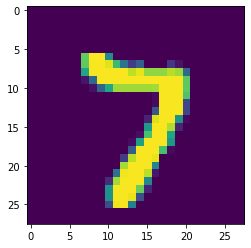

In [19]:
plt.imshow(X[0].view(28,28))
plt.show()

In [20]:
print(torch.argmax(net(X[0].view(-1, 28*28))[0]))

tensor(7, grad_fn=<NotImplemented>)
